## 二項分布の計算

dbinom は二項分布の確率関数の値, 下の式では成功確率が 0.3である, 試行を 10回行ったときに、4回成功する確率を計算。

[二項分布の説明](https://bellcurve.jp/statistics/course/6979.html)

[dbinom関数の説明](https://mathwords.net/dbinom#%E3%81%A1%E3%82%87%E3%81%86%E3%81%A9_x_%E5%9B%9E%E6%88%90%E5%8A%9F%E3%81%99%E3%82%8B%E7%A2%BA%E7%8E%87%E3%82%92%E6%B1%82%E3%82%81%E3%82%8B)

In [105]:
# 引数名を明記しないパターン
# dbinom(4, 10, 0.3)

#　引数名を明記するパターン,4回成功、10回試行、成功率1/6
dbinom(x=4, size=10, prob=1/6) 

[1] 0.05426588

---
## 二項分布の確率を計算

In [106]:
p<-0.3
x<-0:5 # 012345

# 試行を length(x)-1 回を行って、　成功率はp, x回成功する確率
# 下の一個の式で６つの値が計算される
prob<-dbinom(x, length(x)-1, p)
prob

[1] 0.16807 0.36015 0.30870 0.13230 0.02835 0.00243

## 二項分布を描画 

二項分布の期待値は　$E=np=100*1/6=16.7$

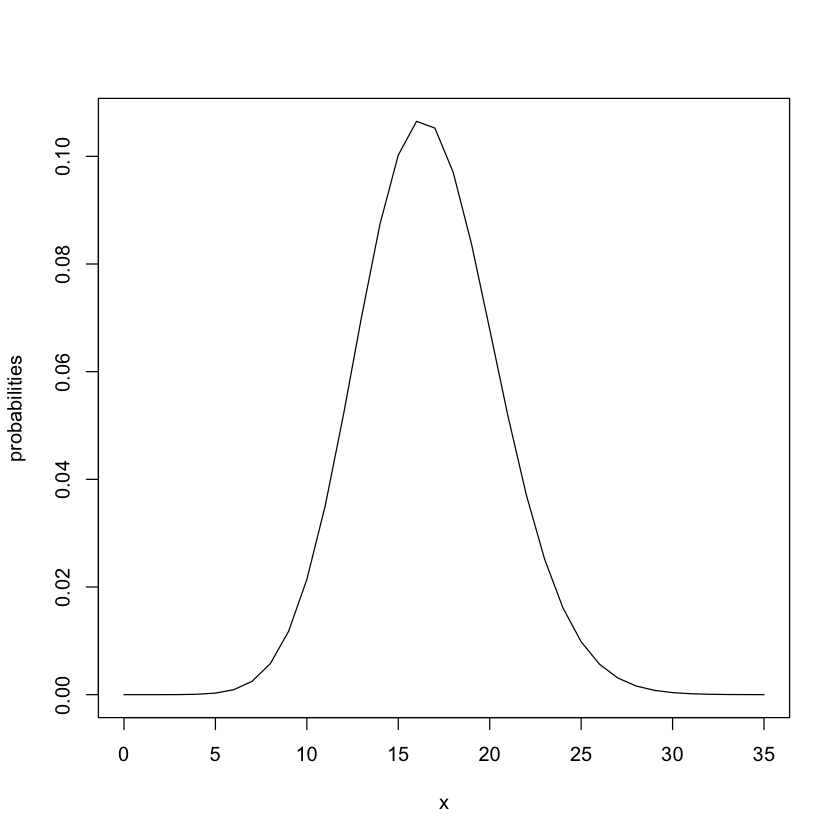

In [111]:
# 成功率 1/6, 100試行して、(0回、1回、2回, ... 35回）成功する確率
x <- c(0:35)
probabilities <- dbinom(x = x, size = 100, prob = 1 / 6)
plot(x, probabilities, type = "l")

---


## 二項分布の図をプロット

[1] 0.16807 0.36015 0.30870 0.13230 0.02835 0.00243

[1] "0" "1" "2" "3" "4" "5"

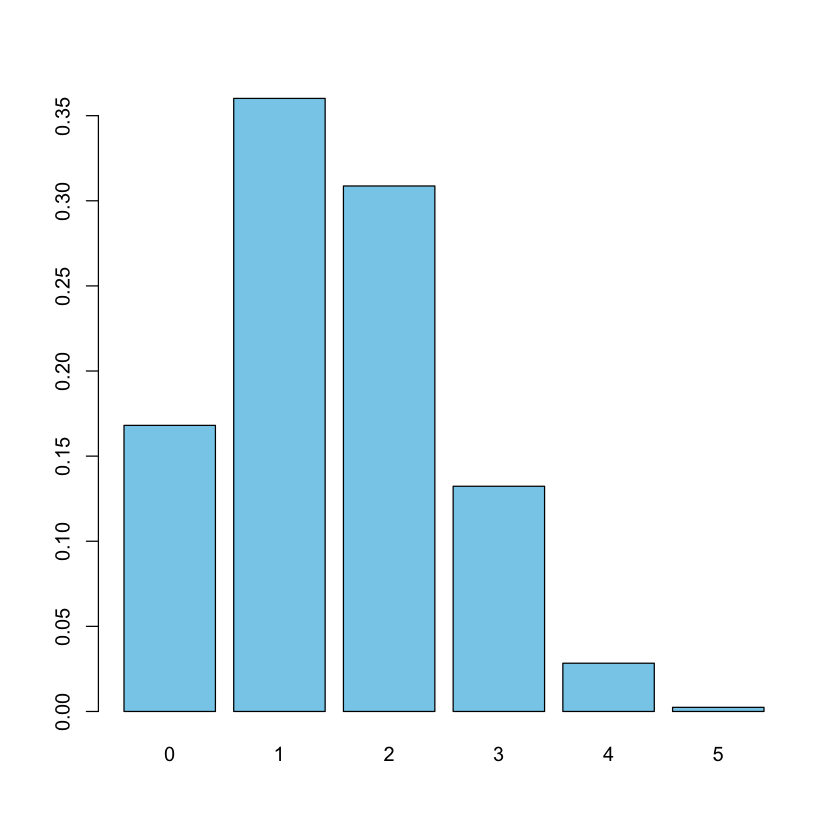

In [113]:
p<-0.3
x<-0:5 # 012345

# 施行を length(x)-1 回を行って、　成功率はp, x回成功する確率
prob<-dbinom(x, length(x)-1, p)
prob
names(prob)<-x # 確率の横軸を設定
names(prob)
barplot(prob,col="skyblue")


---

## sapply関数の例

[こちらを参照](https://www.phd-karaage.com/entry/apply_family_with_R#sapply%E3%81%A8lapply)

In [122]:
data <- iris
# dataの１列目から４列目だけを取り出す

head(data[1:4]) 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [123]:
# 列ごとに平均を求める
print(sapply(data[1:4], mean))

# Sepal.Length 列だけ取り出して、表示する
# print(sapply(data[1:4], mean)['Sepal.Length'])

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333 


---

## 箱ひげ箱(boxplot)の作り方

[参照](https://datasciencehenomiti.com/programing/r/boxplot/)

In [124]:
data <- iris
head(data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


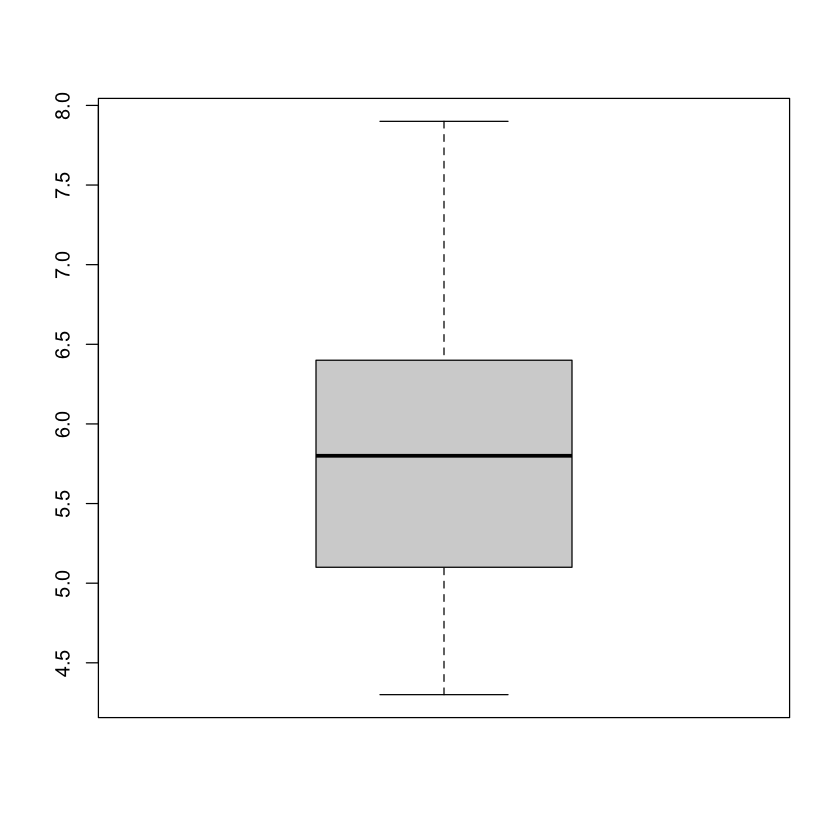

In [128]:
# １列のデータをプロットする
boxplot(x = data$Sepal.Length)


## ggplotで箱ひげ図を描画


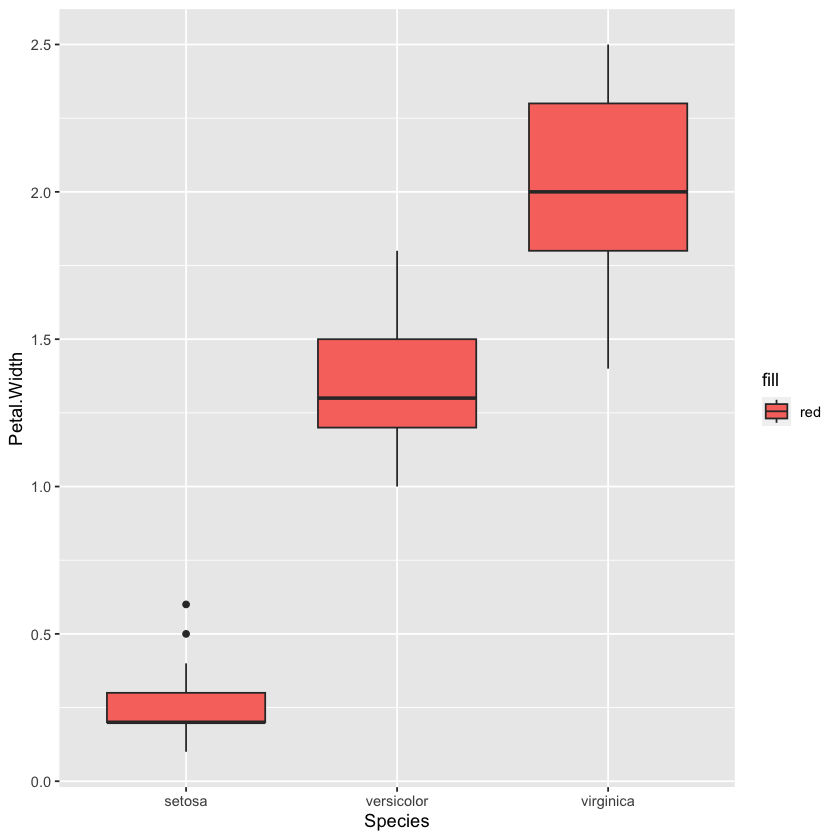

In [134]:
library(ggplot2)

g <- ggplot(iris)+geom_boxplot(aes(x=Species,y= Petal.Width,fill="red"))
plot(g)

---

## ポアソン分布

ポアソン分布で近似するための目安
1. 試行回数nがやたらと大きい。１万とか、それ以上とか
2. 生起確率pがやたらと小さい。1/1000とか、1/10000とか


ポアソン分布の分布関数

説明の例１：埼玉県平均すると毎年1 ($\lambda$)人の人気芸能人が輩出している。今年2人($x$)ブレイクする確率はどれほどとか

説明の例２：ある工場では、毎月不良品が平均2つ（($\lambda$)）出ている。この工場で不良品が0（$x$）となる確率を求めよ



ポアソン分布の計算式: $ Poi(x|\lambda) = \frac{e^{-\lambda}\lambda^x}{x!}$

ポアソン分布の確率は、Rの `dpois(x = x_vals, lambda = lambda)` で計算できます。

In [1]:
lambda <- 4.5
ceiling(lambda)

[1] 5

In [15]:
x_vals <- seq(from = 0, to = ceiling(lambda) * 3)
x_vals

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

In [44]:
# ポアソン分布の確率は、dpois()で計算できます。確率変数の引数xにx_vals、パラメータの引数lambdaに4.5を指定します。
dpois(x = x_vals, lambda = lambda)

[1] 1.110900e-02 4.999048e-02 1.124786e-01 1.687179e-01 1.898076e-01
 [6] 1.708269e-01 1.281201e-01 8.236295e-02 4.632916e-02 2.316458e-02
[11] 1.042406e-02 4.264389e-03 1.599146e-03 5.535504e-04 1.779269e-04
[16] 5.337808e-05

---

## ポアソン分布を描画 

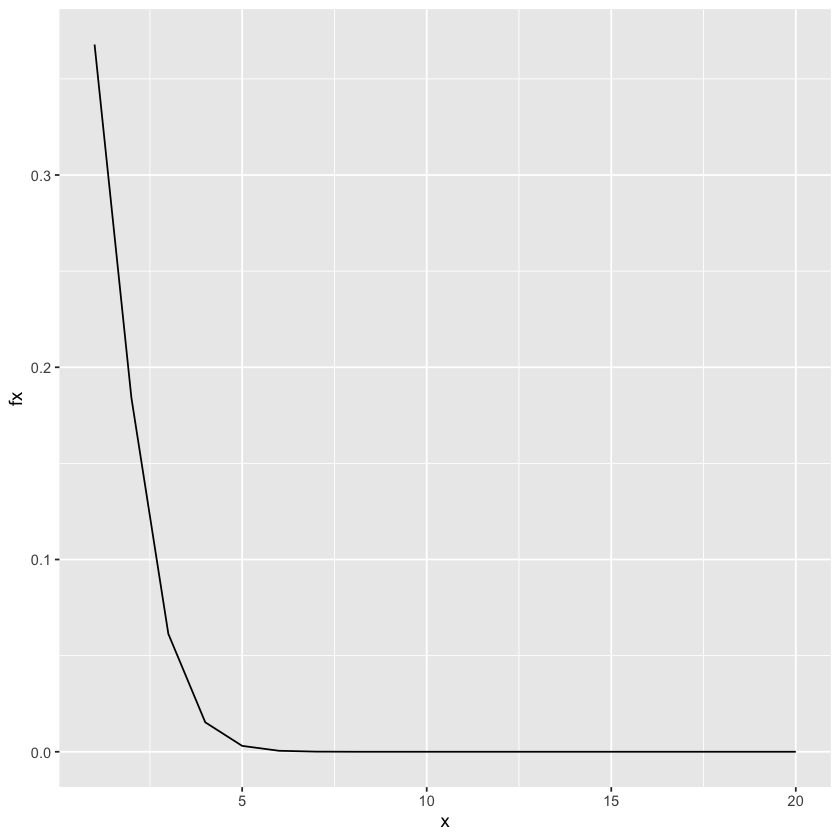

In [121]:
library(ggplot2)
x <- 1:20
# ポアソン分布の確率は、dpois()で計算できます。確率変数の引数xにx_vals、パラメータの引数lambdaは期待値である。
fx <- dpois(x=x, lambda=1)
data <-data.frame(x=x,y=fx)

# 縦軸のyはx回起こった場合の確率
ggplot(data, aes(x=x,y=fx)) + 
    geom_line()

---

## Box Plots with Two Factors

In [17]:
LungCapData <- read.csv("data/LungCap.csv", header=T,sep=",")
head(LungCapData)

names(LungCapData) # 列名を出力

,LungCap,Age,Height,Smoke,Gender,Caesarean
,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
1,6.475,6,62.1,no,male,no
2,10.125,18,74.7,yes,female,no
3,9.550,16,69.7,no,female,yes
4,11.125,14,71.0,no,male,no
5,4.800,5,56.9,no,male,no
6,6.225,11,58.7,no,female,no


[1] "LungCap"   "Age"       "Height"    "Smoke"     "Gender"    "Caesarean"

In [18]:
# The database is attached to the R search path. 
# This means that the database is searched by R when evaluating a variable, 
# so objects in the database can be accessed by simply giving their names.
attach(LungCapData)

The following objects are masked from LungCapData (pos = 3):

    Age, Caesarean, Gender, Height, LungCap, Smoke




喫煙するかしないかだけ見ても、このboxplotはわかりにくい、なぜかというと喫煙の場合LungCapacityのmedian値は大きい。
おそらく喫煙の人は大人が多いので、大人のLungCapacityは大きいから

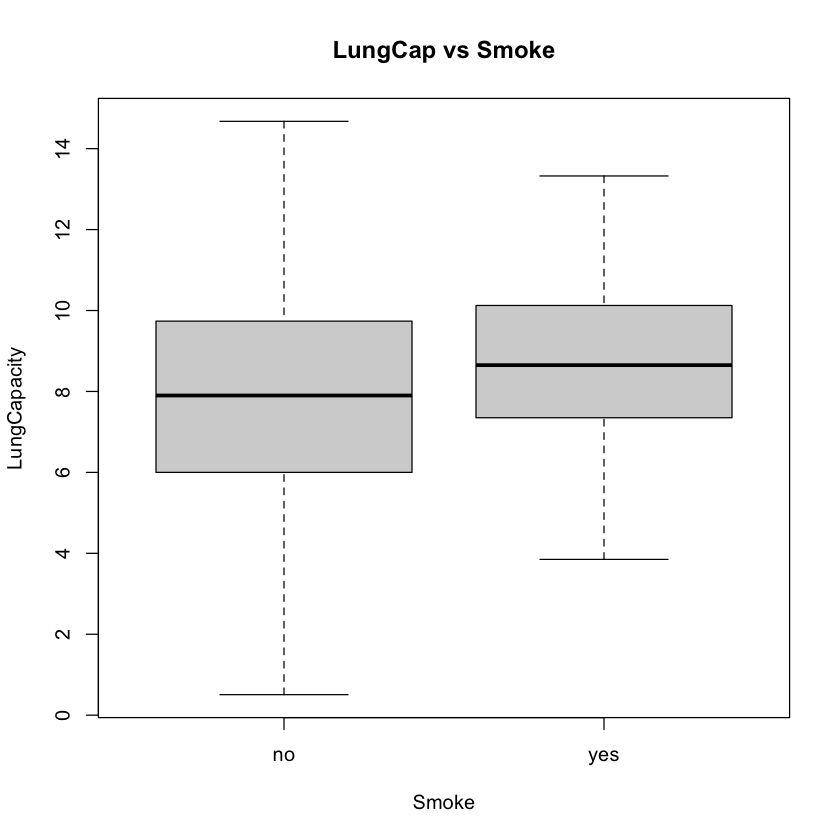

In [19]:
# 縦軸はLungCap列のデータ
# 横軸は喫煙する（yes）かしない(no)かのカテゴリ
boxplot(LungCap~Smoke, ylab="LungCapacity", main="LungCap vs Smoke")

---

## 組み合わせの計算

組み合わせが何パターンあるかは、Rの `choose()` 関数で以下のように求めることができます。 [chooseの参照リンク](https://toukei.link/programmingandsoftware/r/combinationpermutation/)

たとえば： $ {}_4 C_2 $

In [20]:
choose(n=4,k=2)

[1] 6

---

## 多項式の関数の微分

expression関数で数式をセットしておいて、`D` という関数を呼び出す。

In [21]:
func <- expression( x^4 + 2*x^3 + 3*x^2 + 4*x + 5 )
D(func, "x")

4 * x^3 + 2 * (3 * x^2) + 3 * (2 * x) + 4

---

## (WIP)T Test

A `t test` is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.


ビルドインのCO2データセットを利用する

CO2データ設定との説明

Plant : an ordered factor with levels Qn1 < Qn2 < Qn3 < ... < Mc1 giving a unique identifier for each plant.

Type: a factor with levels Quebec Mississippi giving the origin of the plant

Treatment: a factor with levels nonchilled chilled

conc : a numeric vector of ambient carbon dioxide concentrations (mL/L).

uptake: a numeric vector of carbon dioxide uptake rates

In [47]:
head(CO2)

,Plant,Type,Treatment,conc,uptake
,<ord>,<fct>,<fct>,<dbl>,<dbl>
1,Qn1,Quebec,nonchilled,95,16.0
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
6,Qn1,Quebec,nonchilled,675,39.2


---


## ggplot2入門

ggplot2 is included in the tidyverse package.

`
ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) +  <GEOM_FUNCTION>()
`

In [26]:
install.packages("tidyverse")

also installing the dependencies ‘colorspace’, ‘bit’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘rematch’, ‘bit64’, ‘backports’, ‘generics’, ‘blob’, ‘DBI’, ‘tidyselect’, ‘data.table’, ‘gtable’, ‘isoband’, ‘scales’, ‘gargle’, ‘cellranger’, ‘ids’, ‘timechange’, ‘vroom’, ‘tzdb’, ‘progress’, ‘selectr’, ‘broom’, ‘conflicted’, ‘dbplyr’, ‘dplyr’, ‘dtplyr’, ‘forcats’, ‘ggplot2’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘hms’, ‘lubridate’, ‘modelr’, ‘readr’, ‘readxl’, ‘reprex’, ‘rvest’, ‘tidyr’





The downloaded binary packages are in
	/var/folders/w2/kvdjj0td38v9dyn6lk80hj7w0000gp/T//RtmpIdZRF2/downloaded_packages


In [33]:
library(tidyverse)

surveys_complete <- read.csv("data/surveys_complete.csv")
head(surveys_complete)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,X,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>
1,1,63,8,19,1977,3,DM,M,35,40
2,2,64,8,19,1977,7,DM,M,37,48
3,3,65,8,19,1977,4,DM,F,34,29
4,4,66,8,19,1977,4,DM,F,35,46
5,5,67,8,19,1977,7,DM,M,35,36
6,6,68,8,19,1977,8,DO,F,32,52


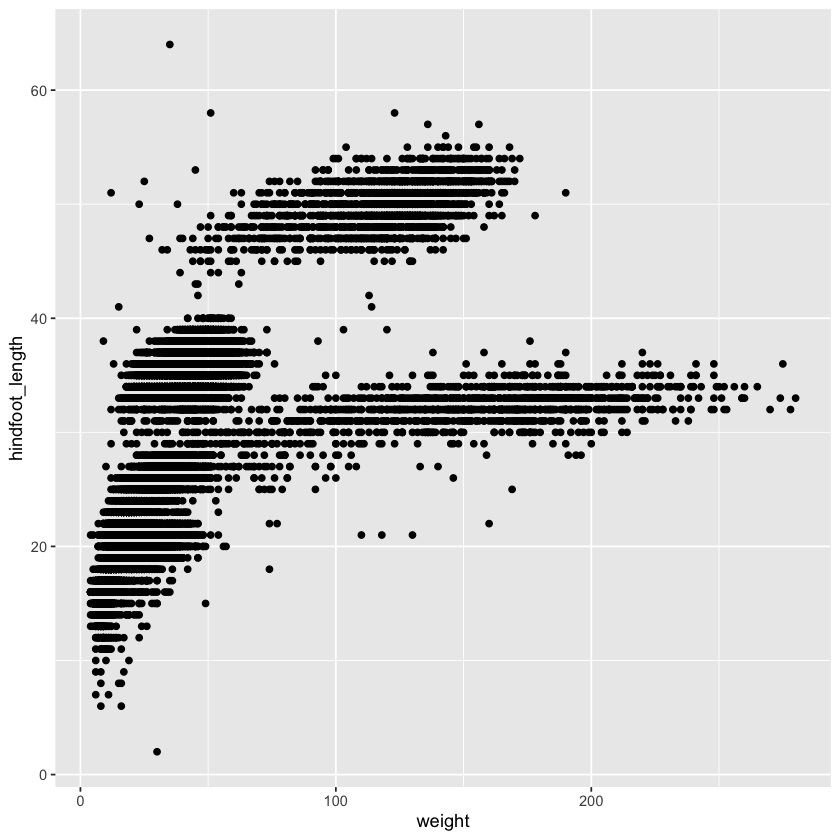

In [58]:
# define an aesthetic mapping (using the aesthetic (aes) function)

# add ‘geoms’ – graphical representations of the data in the plot (points, lines, bars). 
# ggplot2 offers many different geoms; we will use some common ones today, including:
# geom_point() for scatter plots, dot plots, etc.
# geom_boxplot() for, well, boxplots!
# geom_line() for trend lines, time series, etc.


ggplot(data = surveys_complete, mapping = aes(x = weight, y = hindfoot_length)) +
geom_point()


[geom_pointのリファレンス](https://ggplot2.tidyverse.org/reference/geom_point.html)

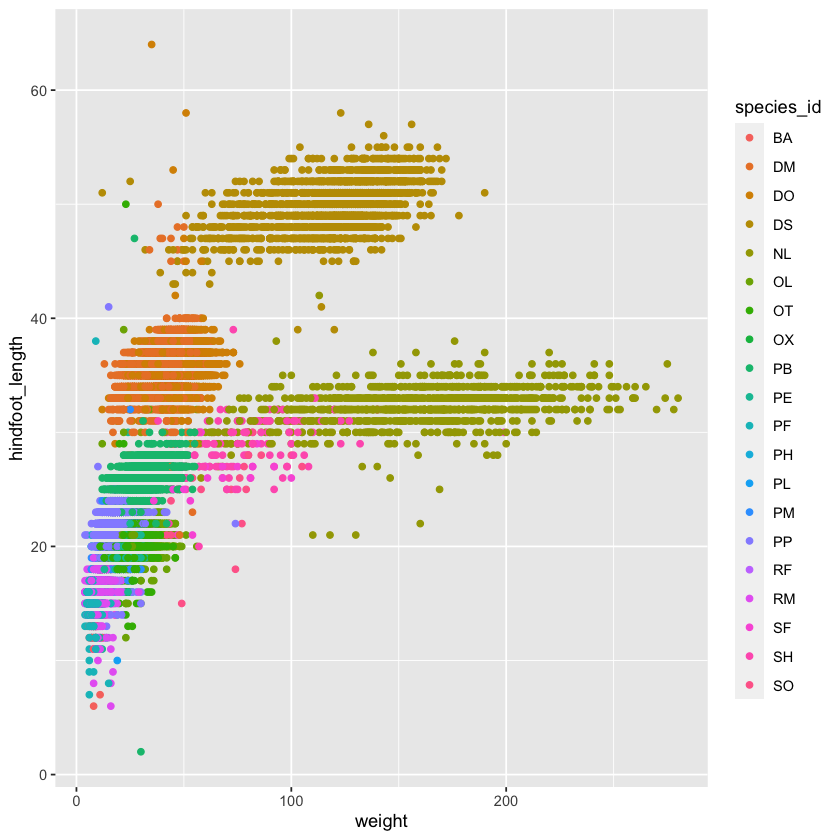

In [59]:
# geom_pointの中でもさらにspecies_idごとに違う色を設定するようにもできる
# alphaは0-1の範囲で設定したら、効果ありそう
ggplot(data = surveys_complete, mapping = aes(x = weight, y = hindfoot_length)) +
    geom_point(alpha = 1, aes(color = species_id))


---

## 積分のやり方


積分は以下の関数で計算

```
integrate(関数, 積分の下端, 積分の上端)
```

引数の`関数`は `function` で定義

以下の積分を求めると

$$\int_{0}^{1}x^2dx$$


下の式を求めることになる

$\lbrack\frac{1}{3}x^3\rbrack_{0}^{1} = \frac{1}{3}*1 - \frac{1}{3}*0 = 0.333333 $


In [79]:
f <- function(x) {x^2} 
integrate(f, 0, 1)

0.3333333 with absolute error < 3.7e-15

---

## 分散の求め方

不偏標本分散を計算する関数は `var()`という関数。

不偏標本分散（unbiased variance）とは？
標本分散が母分散に等しくなるように補正したもの。
標本分散は標本（データ）から計算した分散で、母集団に比べて標本数が少ない時には母分散に比べて小さくなる傾向がある。それを補正したものが「不偏標本分散」。
統計の分野では不偏分散を用いられることが多い。

In [81]:
x <-c(5.23,6.12,5.79)
var(x)

[1] 0.2024333

---

## Rのtibble

data.frameとtibbleの比較

In [89]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [90]:
head(as_tibble(iris))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


新しいtibbleを作成

In [218]:
tibble(
  x = 1:5, 
  y = 1, 
  z = x ^ 2 + y
)

x,y,z
<int>,<dbl>,<dbl>
1,1,2
2,1,5
3,1,10
4,1,17
5,1,26


tribbleを使って、ビジュアル的にわかりやすく設定できる。

In [94]:
df <- tribble(
  ~x, ~y, ~z,
  #--|--|----
  "a", 2, 3.6,
  "b", 1, 8.5
)
df

x,y,z
<chr>,<dbl>,<dbl>
a,2,3.6
b,1,8.5


tibbleのSubsetting

x列あるいはy列を取り出す

In [105]:
df[["x"]]

[1] "a" "b"

In [104]:
df[['y']]*2

[1] 4 2

---

## Rのmutate関数

データセットに新たに変数を追加する関数です。また、既存の変数の書き換えも可能です。dplyrパッケージでも高頻度で利用される基本的な関数の一つです。

In [128]:
data.frame(Seed=0:15) %>% # 種子数を0から15と仮定する
  mutate(Lambda3.5=dpois(Seed, lambda=3.5), # それぞれのλのポワソン分布を発生させる
         Lambda7.7=dpois(Seed, lambda=7.7),
         Lambda15.1=dpois(Seed, lambda=15.1))

Seed,Lambda3.5,Lambda7.7,Lambda15.1
<int>,<dbl>,<dbl>,<dbl>
0,3.019738e-02,0.0004528272,2.767919e-07
1,1.056908e-01,0.0034867693,4.179557e-06
2,1.849590e-01,0.0134240618,3.155566e-05
3,2.157855e-01,0.0344550920,1.588301e-04
4,1.888123e-01,0.0663260522,5.995838e-04
5,1.321686e-01,0.1021421204,1.810743e-03
6,7.709835e-02,0.1310823878,4.557037e-03
7,3.854917e-02,0.1441906266,9.830179e-03
8,1.686526e-02,0.1387834781,1.855446e-02


---

## 正規分布の図を描画

正規分布は英語で normal distribution と良い，Rでの関連コマンドには norm の文字が入る。

統計分布についてのRの関数には，あるxに対する確率密度を求める d... と累積確率を求める p... 

正規分布には，変化し得る要素として平均 mean と標準偏差 sd の二つがある。

これらを特定しなければ，正規分布が定まらない。標準正規分布では mean=0, sd=1 である。


In [134]:
# dnorm( x, mean=m, sd=n ) → 平均ｍ、標準偏差ｎの正規分布確率密度を返す
dnorm(x)

[1] 2.419707e-01 5.399097e-02 4.431848e-03 1.338302e-04 1.486720e-06
 [6] 6.075883e-09 9.134720e-12 5.052271e-15 1.027977e-18 7.694599e-23
[11] 2.118819e-27 2.146384e-32 7.998828e-38 1.096607e-43 5.530710e-50
[16] 1.026163e-56 7.004182e-64 1.758750e-71 1.624636e-79 5.520948e-88

In [174]:
# x軸の値：　−5から5までx軸の値を501個を指定
x_vec = seq(from = -5, to = 5, length.out = 501)
# tibbleのdataframeを作成。
# x軸は x_vec
# y軸はdnormを使って確率密度を計算した値
dens_df <- tibble::tibble(
  x = x_vec, 
  density = dnorm(x=x_vec, mean = 0, sd = 1)
)
head(dens_df)

x,density
<dbl>,<dbl>
-5.00,1.486720e-06
-4.98,1.642751e-06
-4.96,1.814431e-06
-4.94,2.003252e-06
-4.92,2.210839e-06
-4.90,2.438961e-06


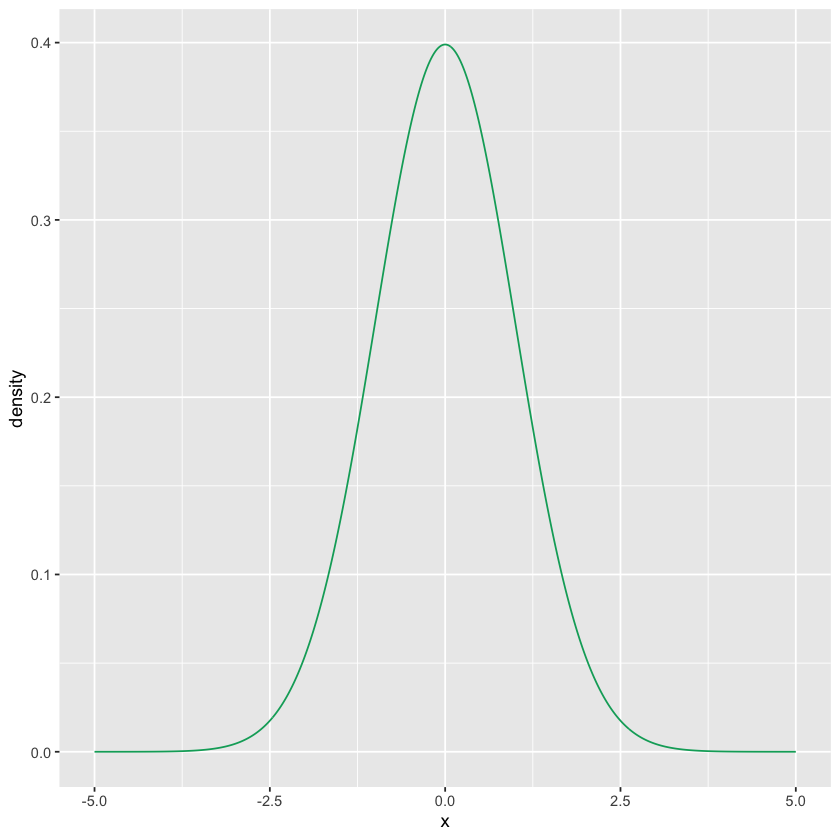

In [175]:
# 正規分布を折れ線グラフで作図
ggplot() + 
  geom_line(data = dens_df, mapping = aes(x = x, y = density), 
            color = "#00A968") # 確率密度

---

## 幾何分布
[幾何分布の説明リンク](https://bellcurve.jp/statistics/course/6988.html)

成功確率$p$がである独立なベルヌーイ試行を繰り返す時、初めて成功するまでの試行回数$X$が従う確率分布を「幾何分布（きかぶんぷ）」といいます。


$$ P(X=k) = {(1-p)^{k-1}}{p}$$


幾何分布をRで導出するにはdgeom関数を使用します。　[関数の説明リンク](http://by-oneself.com/r_for_baseball16/#5)

```
dgeom(x, p)
x:初めて成功するまでに失敗した回数
p: 成功確率
```

In [178]:
# サイコロを投げて、１が出る確率が1/6で、３回目で初めて１が出る確率は下の式で計算できる(0.116になる)
# dgeomの一個目の引数２は成功までの失敗回数！！
dgeom(2, 1/6)

[1] 0.1157407

In [180]:
# 初めて2回目成功、初めて３回目で成功、初めて４回目で成功のリストの計算も下のようにできる
dgeom(1:3, 1/6)

[1] 0.13888889 0.11574074 0.09645062

---
## 幾何分布を描画

x,prob
<int>,<dbl>
1,0.13888889
2,0.11574074
3,0.09645062
4,0.08037551
5,0.06697960
6,0.05581633


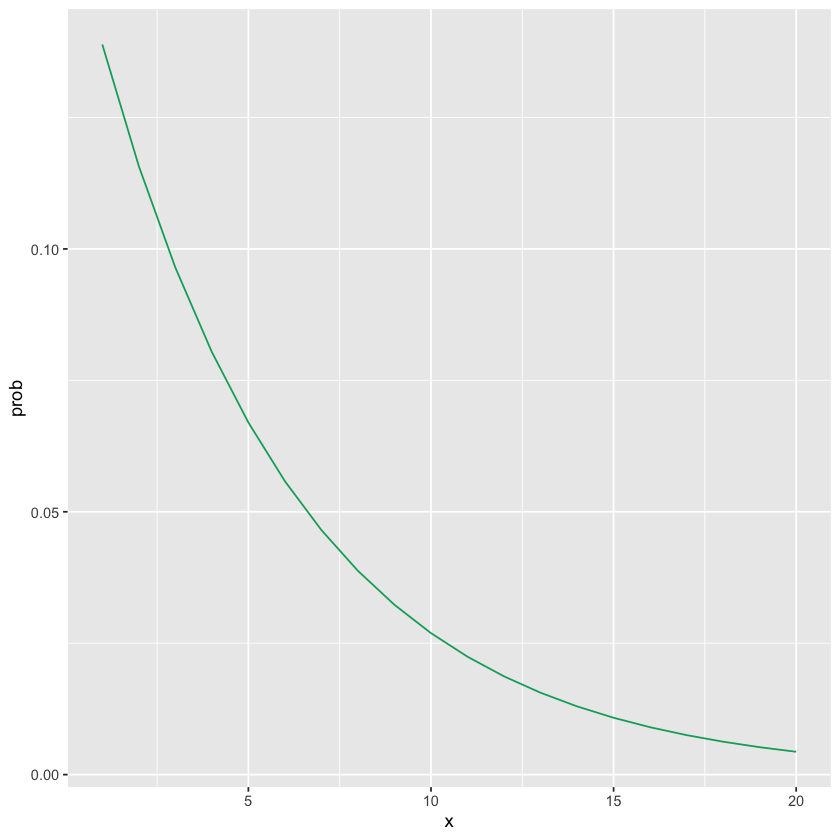

In [260]:
# x軸の値：　−5から5までx軸の値を20個を指定
x_vec = seq(from = 1, to = 20)
# tibbleのdataframeを作成。
# x軸は x_vec
# y軸はdnormを使って確率密度を計算した値
prob_df <- tibble::tibble(
  x = x_vec, 
  prob = dgeom(x_vec, 1/6)
)
head(prob_df)

# 幾何分布のグラフを作成
ggplot() + 
  geom_line(data = prob_df, mapping = aes(x = x, y = prob), 
            color = "#00A968") # 確率密度

---
## Rのパイプライン

パイプライン`%>%` を利用する場合 `install.packages("dplyr")`コマンドでdplyrをインストールする必要がある。

In [11]:
# gapminderというtibble型のデータを用意
#install.packages("gapminder")
library(gapminder)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [12]:
#install.packages("dplyr")
library(dplyr)
gapminder  %>% 
    # countryとlifeExp列だけを選択
    select(country, lifeExp) %>% 
    
    # countryを２つに絞る
    filter(country == "South Africa" |
           country == "Ireland") %>% 
    
    # countryごとに集計する
    group_by(country) %>%

    # 集計した結果を出す
    summarise(Average_life = mean(lifeExp))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




country,Average_life
<fct>,<dbl>
Ireland,73.01725
South Africa,53.99317


---
## 正規分布のZ値 

例えば学生のテストの成績が正規分布に従うとして、平均60点、標準偏差が10($1\sigma$)
とある学生が80点を取った。この学生の点数のZ値は $(80-60)/10=2$

標準正規分布の $2 \sigma$, 

`pnorm(Z値)` 関数でZ値以下(2以下)の確率を求める

`pnorm(Z値, lower,tail=F)` 関数でZ値以上(2以上)の確率を求める

In [7]:
pnorm(2) # Z値以下(2以下)の確率
pnorm(2,lower.tail=F) # Z値以上(2以上)の確率
# ?pnorm # ヘルプ

[1] 0.9772499

[1] 0.02275013

---
## Rのそのまま使えるデータセット

In [24]:
#data(package = .packages(all.available = TRUE)) # データセットをリスト

# 例えばmpgデータセットはggplot2ライブラリーに含まれているので、library(ggplot2)でimportすると使えるようになる
library(ggplot2)
#View(mpg)
glimpse(mpg) #データセットの概要

Rows: 234
Columns: 11
$ manufacturer <chr> "audi", "audi", "audi", "audi", "audi", "audi", "audi", "…
$ model        <chr> "a4", "a4", "a4", "a4", "a4", "a4", "a4", "a4 quattro", "…
$ displ        <dbl> 1.8, 1.8, 2.0, 2.0, 2.8, 2.8, 3.1, 1.8, 1.8, 2.0, 2.0, 2.…
$ year         <int> 1999, 1999, 2008, 2008, 1999, 1999, 2008, 1999, 1999, 200…
$ cyl          <int> 4, 4, 4, 4, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 8, 8, …
$ trans        <chr> "auto(l5)", "manual(m5)", "manual(m6)", "auto(av)", "auto…
$ drv          <chr> "f", "f", "f", "f", "f", "f", "f", "4", "4", "4", "4", "4…
$ cty          <int> 18, 21, 20, 21, 16, 18, 18, 18, 16, 20, 19, 15, 17, 17, 1…
$ hwy          <int> 29, 29, 31, 30, 26, 26, 27, 26, 25, 28, 27, 25, 25, 25, 2…
$ fl           <chr> "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p", "p…
$ class        <chr> "compact", "compact", "compact", "compact", "compact", "c…


---
## ggplotのgeom_smooth

`geom_smooth()` using formula = 'y ~ x'


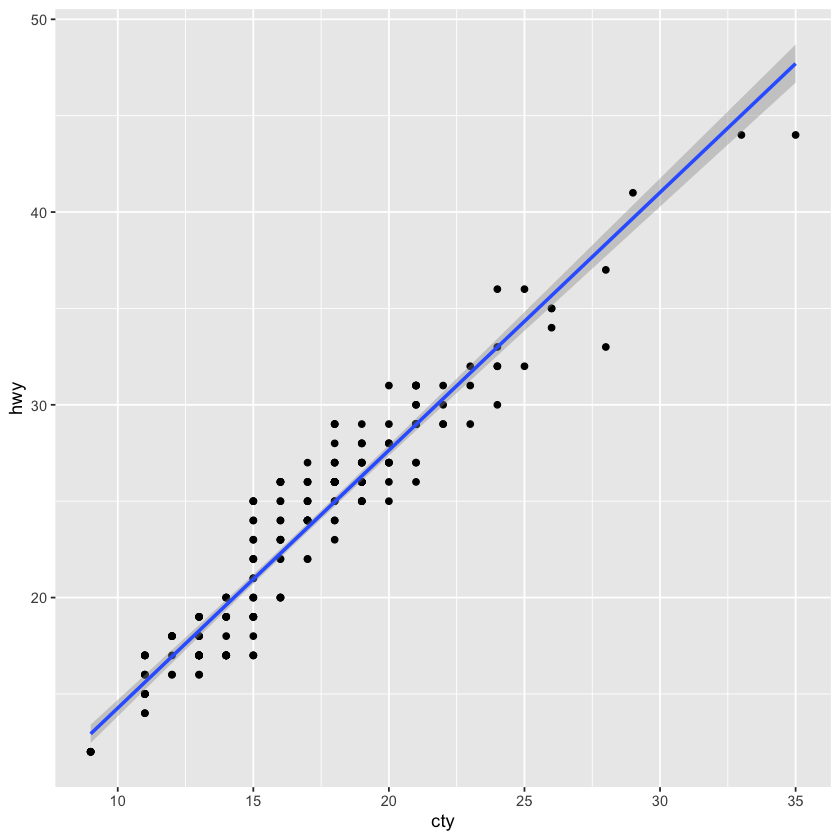

In [37]:
library(ggplot2)
ggplot(mpg, aes(x=cty, y=hwy)) +
    geom_point() +
    geom_smooth(method = "lm")

---

## Rのarrange関数
下の例ではmtcarsデータフレーをdisp列で降順でソートする

In [41]:
#?arrange
arrange(mtcars,desc(disp)) %>% head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cadillac Fleetwood,10.4,8,472,205,2.93,5.250,17.98,0,0,3,4
Lincoln Continental,10.4,8,460,215,3.00,5.424,17.82,0,0,3,4
Chrysler Imperial,14.7,8,440,230,3.23,5.345,17.42,0,0,3,4
Pontiac Firebird,19.2,8,400,175,3.08,3.845,17.05,0,0,3,2
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Duster 360,14.3,8,360,245,3.21,3.570,15.84,0,0,3,4


---
## t分布を描画

t分布の自由度高ければ高いほど、正規分布に近づく


To find the value of `probability density function` (pdf) of the Student’s t-distribution 
given a random variable x, use the `dt()` function in R.

```
dt(x, df)
    x is the quantiles vector
    df is the degrees of freedom
```


`pt()` function is used to get the cumulative distribution function (CDF) of a t-distribution

```
Syntax: pt(q, df, lower.tail = TRUE)

Parameter:

q is the quantiles vector
df is the degrees of freedom
lower.tail – if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x].
```

[t分布の関数説明](https://www.geeksforgeeks.org/understanding-the-t-distribution-in-r/)

In [118]:
# dt関数の例
dt(0.866, 2)
dt(1.2,3)

[1] 0.2192862

[1] 0.1678016

In [120]:
pt(q = 0.866, df = 2, lower.tail = FALSE)
pt(q = 1, df = 10, lower.tail = TRUE) 
pt(q = 1, df = 5, lower.tail = TRUE) # 自由度越小，t分布的图越扁


[1] 0.2388891

[1] 0.8295534

[1] 0.8183913

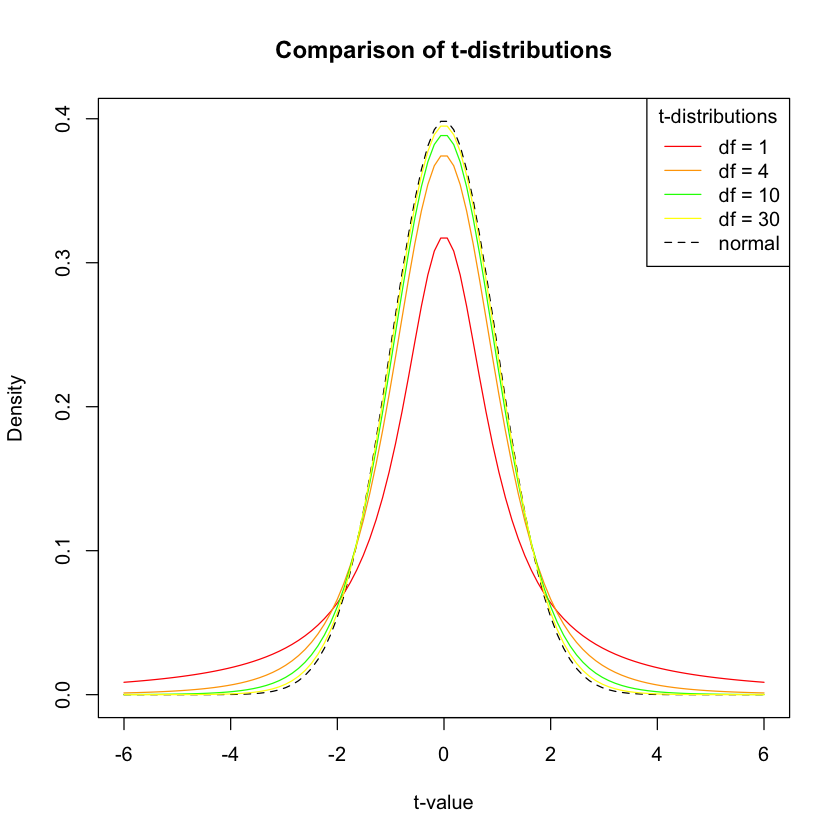

In [72]:
# Generate a vector of 100 values between -6 and 6
x <- seq(-6, 6, length = 100)

# Degrees of freedom, ４つのt分布の描画するので、四つの自由度を設定する
df = c(1,4,10,30)

# それぞれの分布を違う色で描画する
colour = c("red", "orange", "green", "yellow","black") 

# Plot a normal distribution, lty=2で点線を指定する。 lty=1にすると、普通の線になる
plot(x, dnorm(x), type = "l", lty = 2, xlab = "t-value", ylab = "Density", 
     main = "Comparison of t-distributions", col = "black")

for(i in 1:4) {
    lines(x, dt(x, df[i]), col=colour[i])
}

# Add a legend
legend("topright", c("df = 1", "df = 4", "df = 10", "df = 30", "normal"), 
       col = colour, title = "t-distributions", lty = c(1,1,1,1,2))

---
## geom_dotplotとgeom_boxplot組み合わせ

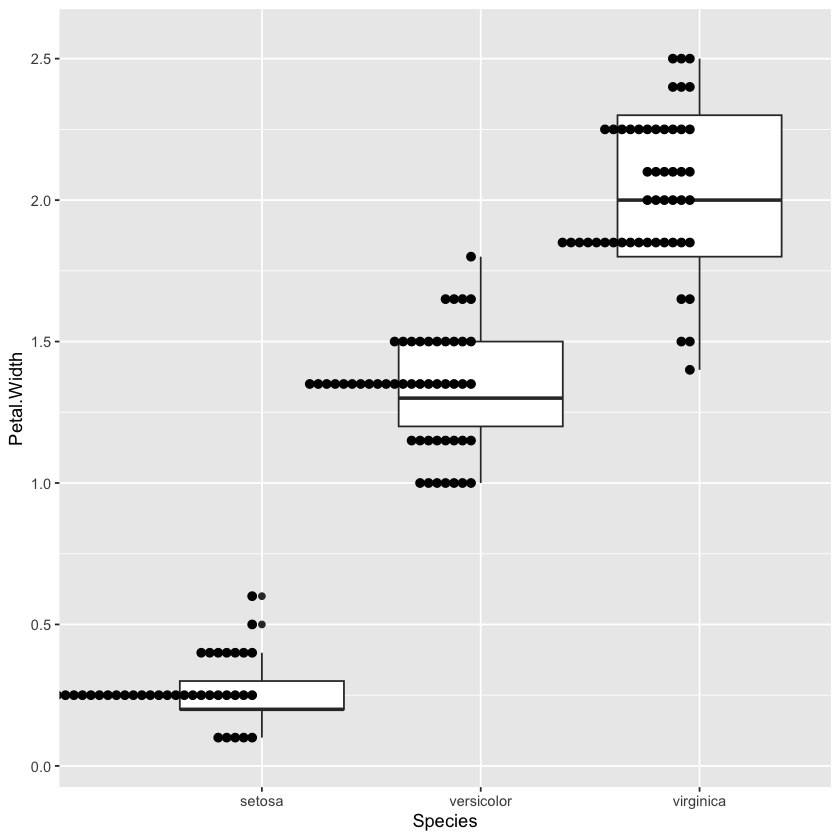

In [157]:
g <- ggplot(iris,aes(x=Species, y=Petal.Width))+
  geom_boxplot()+
  #geom_jitter(aes(x=Species, y=Petal.Width, color = Species,shape=Species,alpha=0.5),width=0.2)
  geom_dotplot(
      binaxis = "y"
    , dotsize = 0.3
    
    # "up"も使える
    , stackdir = "down" 
    
    , binwidth = 0.1
    
    # `.` を左に寄せる
    , position = position_nudge(-0.025)
    )
plot(g)

---

## ggplotのfacet_grid

```
facet_grid(rows=xxx,...) 
```

In [166]:
head(mpg)
# ?mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


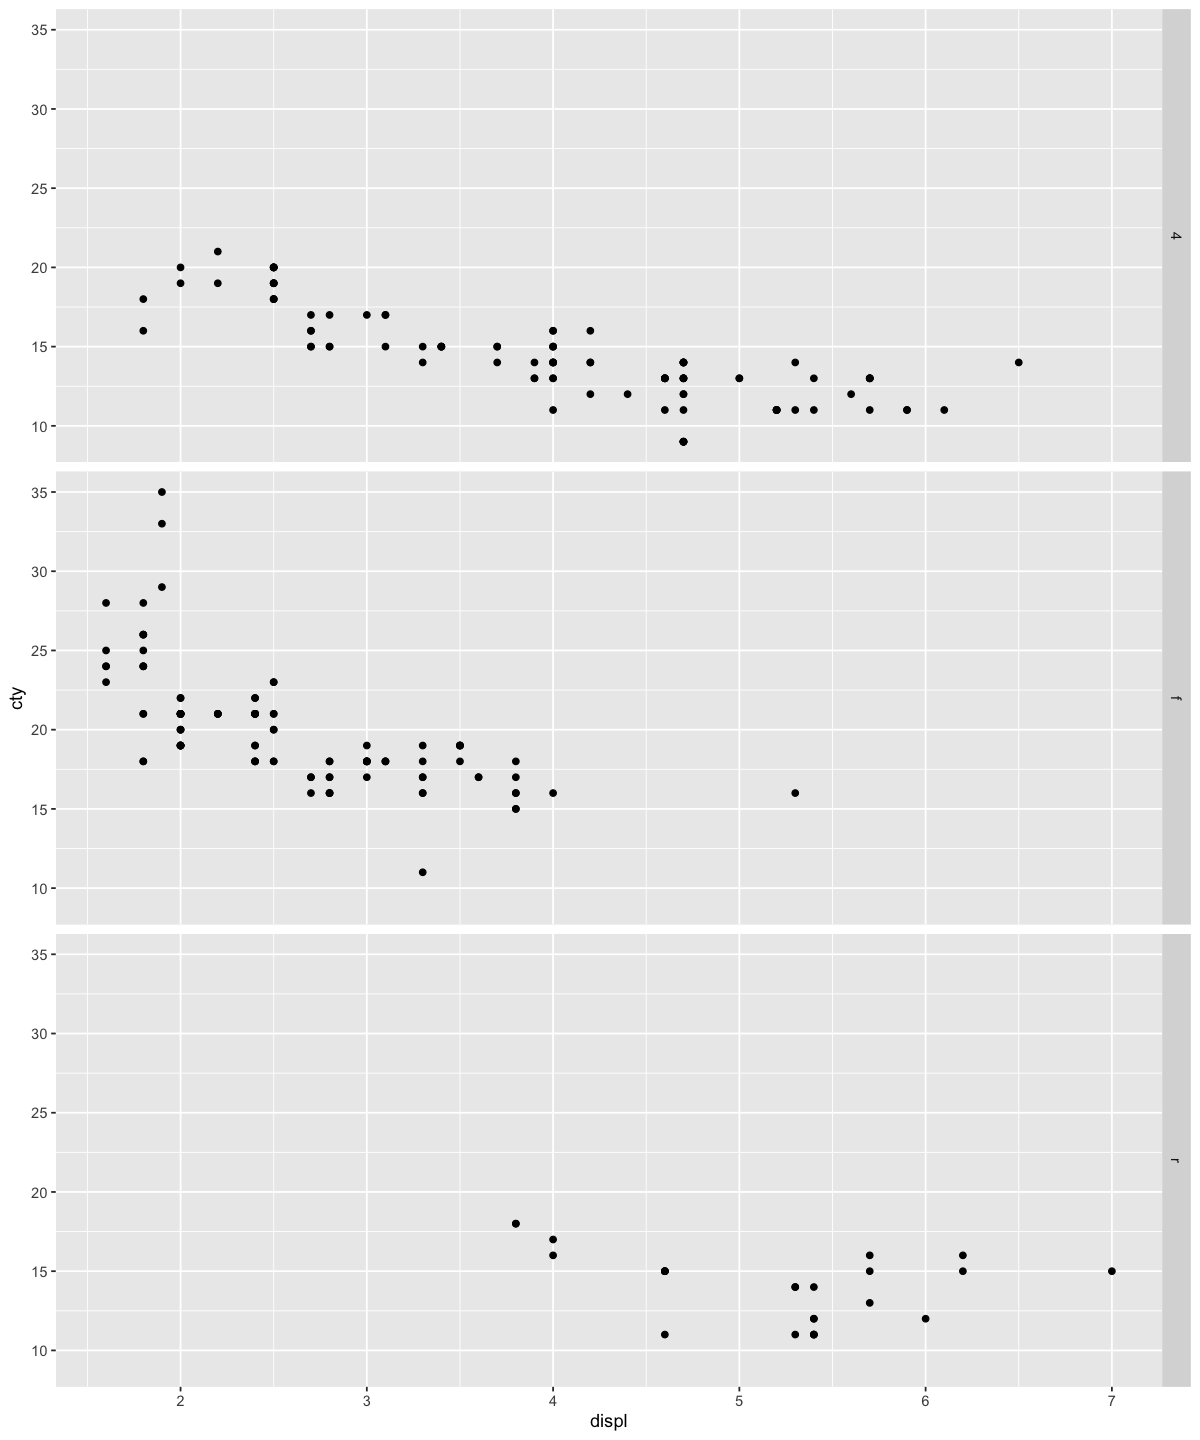

In [188]:
# displ：エンジンの排気量
# cty:  １ガロンのガソリンで運転できるマイル数
# drvのfは前輪駆動、rは後輪駆動、4は四駆
library(ggplot2)

options(repr.plot.width =10 , repr.plot.height =12) # グラフのサイズを指定

p <- ggplot(mpg, aes(displ, cty)) + geom_point()
p + facet_grid(rows = vars(drv))


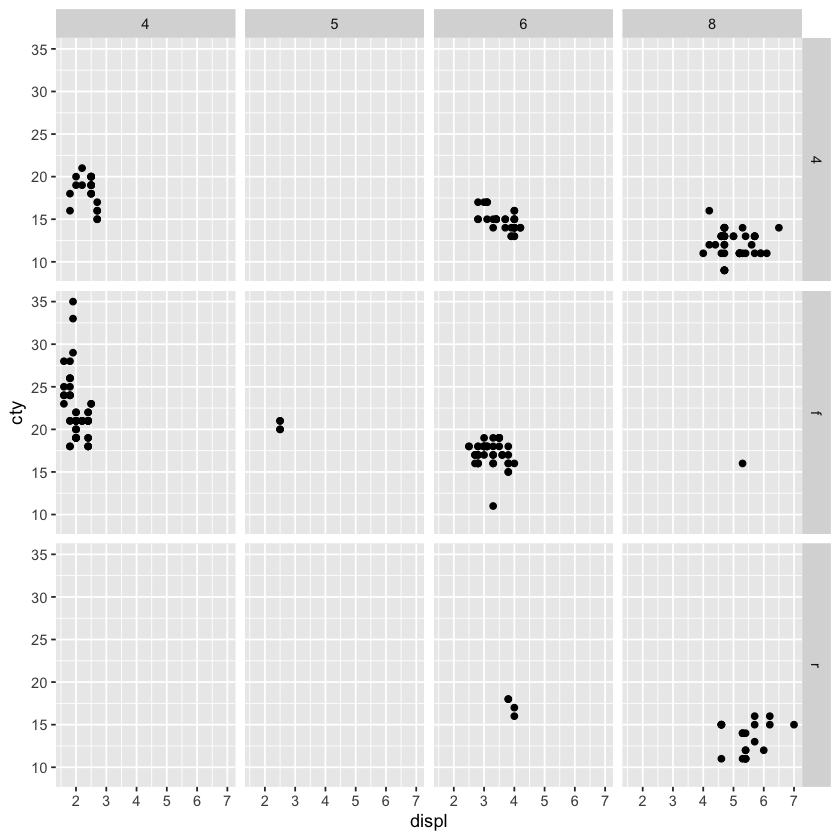

In [182]:
# cyl：シリンダの数 , unique(mpg$cyl)で確認したら４、５、６、８四種類が含まれる
# drvのfは前輪駆動、rは後輪駆動、4は四駆

# scales: Are scales shared across all facets (the default, "fixed"), 
# or do they vary across rows ("free_x"), columns ("free_y"), or both rows and columns ("free")?
p + facet_grid(vars(drv), vars(cyl), scales = "fixed")


---
## ggplotのgeom_violin()

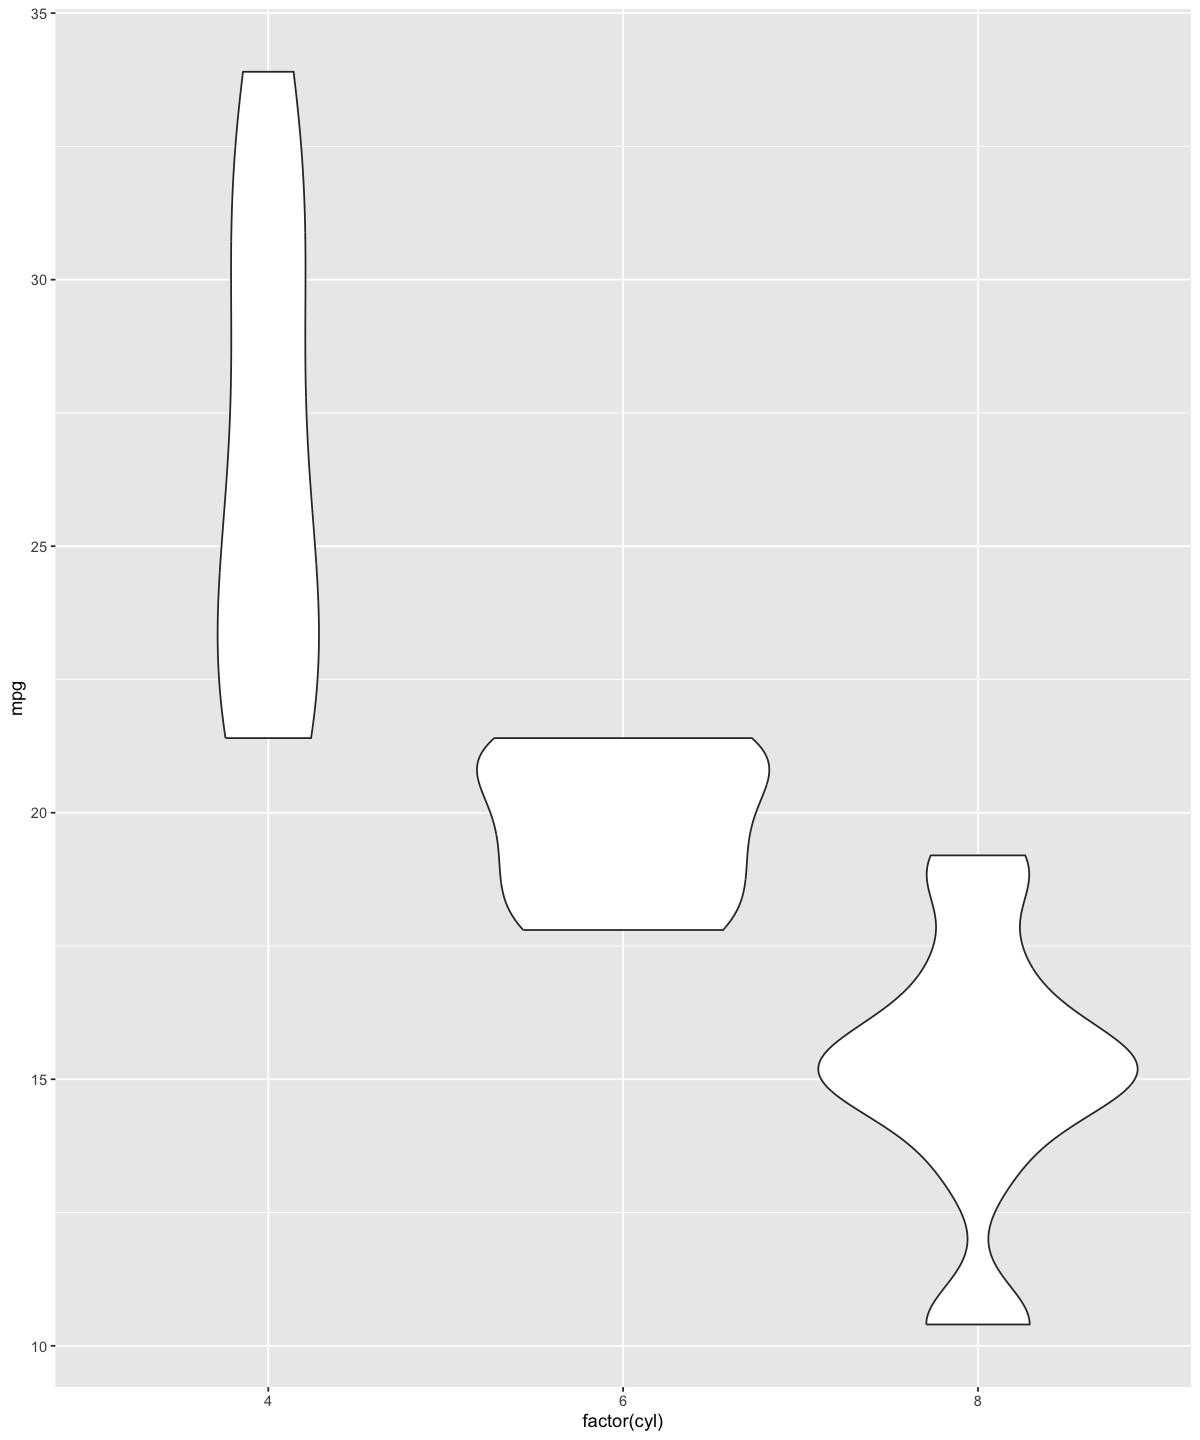

In [198]:
p <- ggplot(mtcars, aes(factor(cyl), mpg))
p + geom_violin()

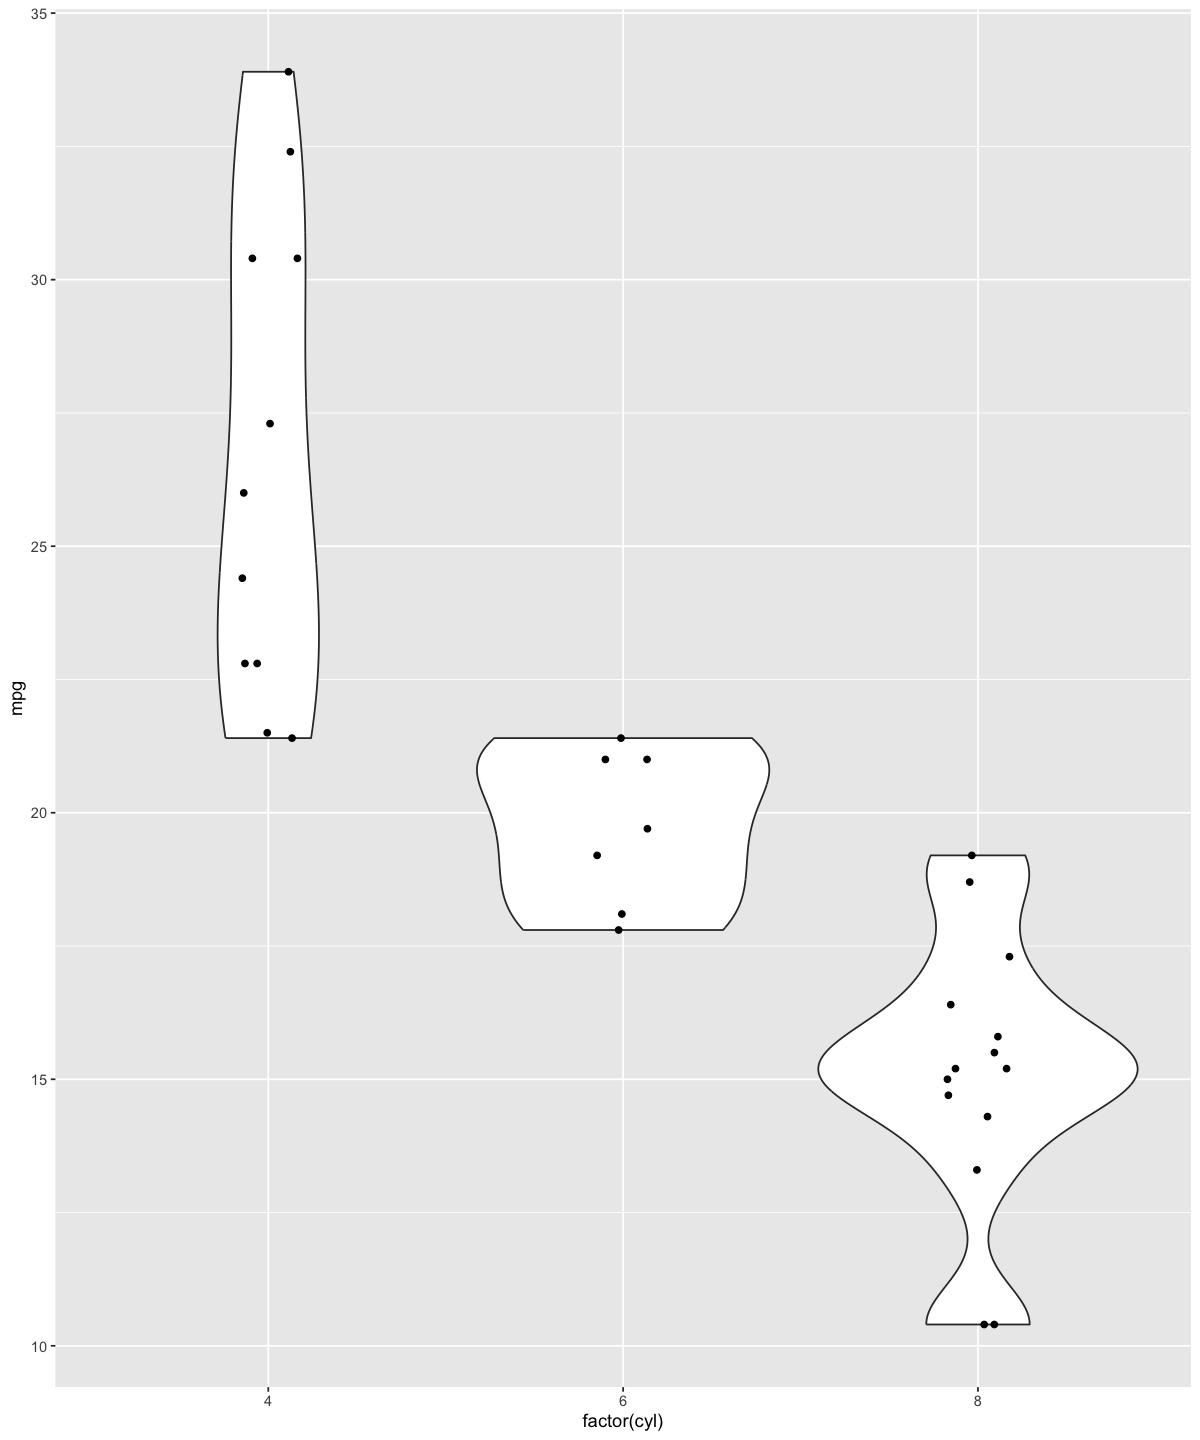

In [205]:

p <- ggplot(mtcars, aes(factor(cyl), mpg))
p + geom_violin() +
geom_jitter(height = 0, width = 0.1)

---
## 一様分布のrunif、punif関数

runif(m, a, b) - 一様分布に従う m 個の乱数のベクトルを返します。a と b は a < b の実数です。m は m > 0 の整数です。

punif(x, a, b) - 値 x の累積確率分布を返します。

[参照リンク](https://support.ptc.com/help/mathcad/r8.0/ja/index.html#page/PTC_Mathcad_Help/uniform_distribution.html)

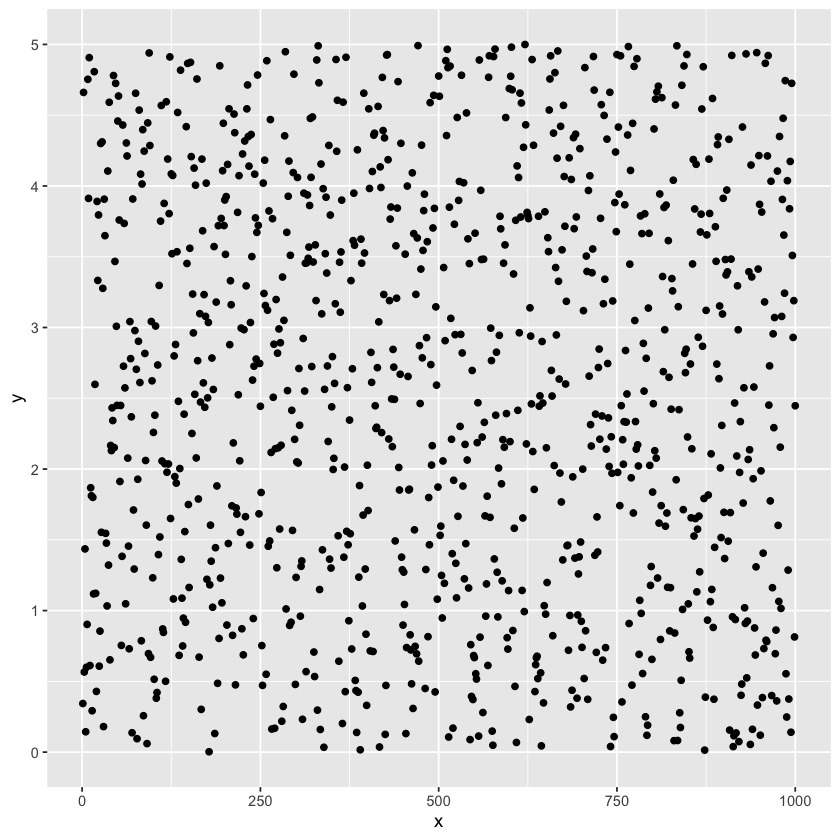

In [250]:
library(ggplot2)

d <- tibble(
  x = 1:1000, 
  y = runif(1000, 0, 5), 
)

options(repr.plot.width =7 , repr.plot.height =7) # グラフのサイズを指定
ggplot(d, aes(x=x, y=y)) +
    geom_point() 


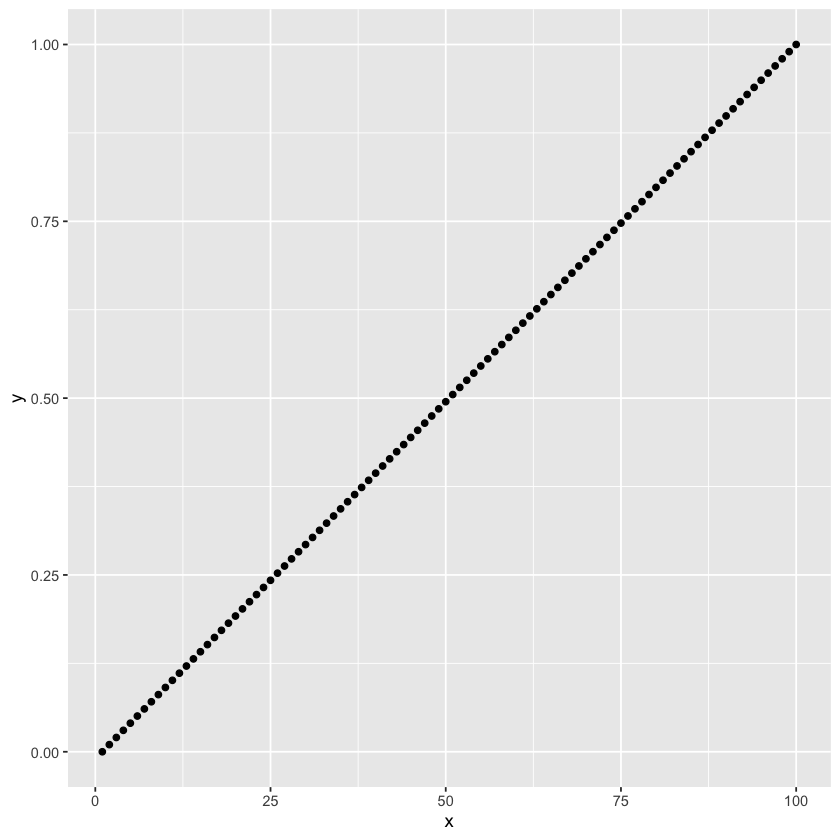

In [251]:
library(ggplot2)

# 同じ間隔で０から5まで100個の値を生成する
x_vec = seq(from = 0, to = 5, length.out = 100)


# punif(x, a, b) - 値 x の累積確率分布を返します。
# https://support.ptc.com/help/mathcad/r8.0/ja/index.html#page/PTC_Mathcad_Help/uniform_distribution.html
d <- tibble(
  x = 1:100, 
  y = punif(x_vec, 0, 5) # punifは累積のほう。２０までの累積確率、25までの累積確率...を描画する。最終は確率は1になる
)

options(repr.plot.width =7 , repr.plot.height =7) # グラフのサイズを指定

ggplot(d, aes(x=x, y=y)) +
    geom_point() 


---
## 正規分布の乱数を生成(rnorm)

以下は10000個乱数を生成、生成した乱数の平均は0, 標準偏差は1
```
rnorm(10000,  mean=0, sd=1)
```

[参照リンク](http://www.okadajp.org/RWiki/?R%E3%81%AE%E5%9F%BA%E6%9C%AC%E3%83%91%E3%83%83%E3%82%B1%E3%83%BC%E3%82%B8%E4%B8%AD%E3%81%AE%E7%A2%BA%E7%8E%87%E5%88%86%E5%B8%83%E3%80%81%E4%B9%B1%E6%95%B0%E9%96%A2%E6%95%B0%E4%B8%80%E8%A6%A7)

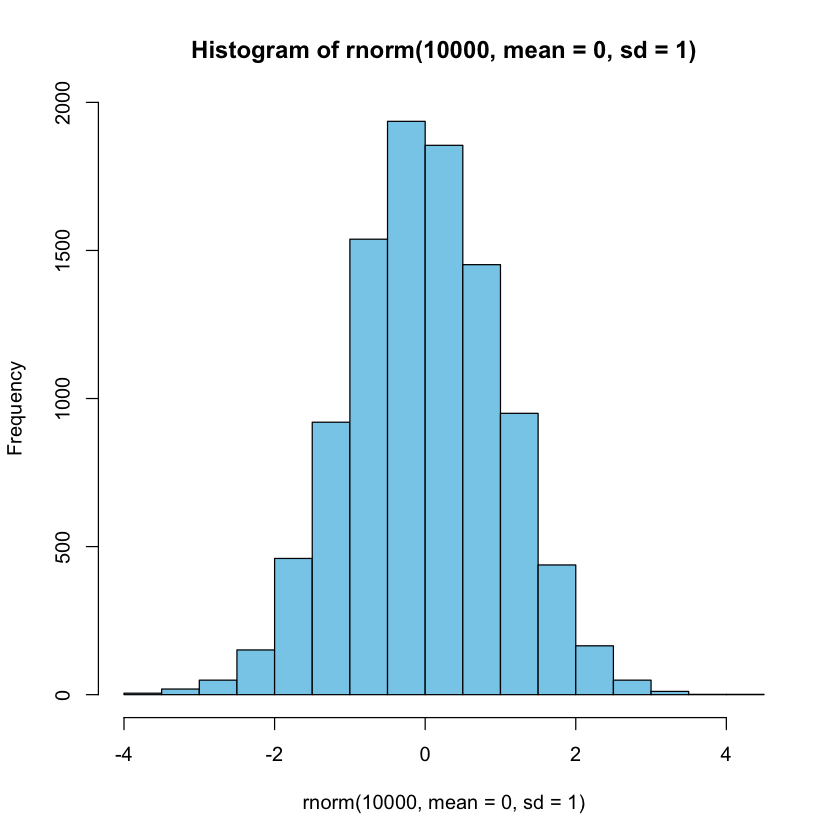

In [263]:
library(ggplot2)

hist(rnorm(10000,  mean=0, sd=1),col="skyblue")


---
## 乱数のSeed

rnorm,　runif関数が毎回違う乱数を生成しているので、set.seed()関数を利用すれば、毎回同じ関数設定してくれる

In [282]:
set.seed(125)
rnorm(3,  mean=0, sd=1) #正規分布の乱数

[1]  0.9333270 -0.5250318  1.8144398

In [281]:
set.seed(125)
runif(4, 0, 5) #一様分布の乱数

[1] 4.1233721 0.5842551 1.4989028 1.7828037

---
## Rのfor loop

[参照リンク](https://www.datamentor.io/r-programming/for-loop)

In [8]:
set.seed(125)
# runif関数で0-1の間で一様分布の乱数４つを生成して、printする
for (i in runif(4,0,1)) {
    print(i)
}

[1] 0.8246744
[1] 0.116851
[1] 0.2997806
[1] 0.3565607


---
## Rのベクトルの積

In [9]:
a <- c(2, 5)
b <- c(3, 9)
a*b

[1]  6 45

In [18]:
set.seed(125)
a <- runif(2,0,1)
b <- runif(2,0,1)
#a
#b
a*b # 結果はa[1]*b[1]=0.247221349916464, a[2]*b[2]=0.0416644857373206

[1] 0.24722135 0.04166449

---
## Rのvectorのフィルタリング


In [22]:
set.seed(125)
a <- runif(5,0,1)
a

[1] 0.8246744 0.1168510 0.2997806 0.3565607 0.9651950

In [37]:
a[a >= 0.8] # 0.8より大きい数字だけ取得

[1] 0.8246744 0.9651950

In [29]:
length(a[a >= 0.8]) # 0.8より大きい数字は2個ある

[1] 2

In [33]:
a[a >= 0.8 | a <=0.3] # orで条件をつなげる

[1] 0.8246744 0.1168510 0.2997806 0.9651950

In [36]:
a[a >= 0.8 & a <=0.9] # andで条件をつなげる

[1] 0.8246744

---
## $\pi$の計算

In [52]:
set.seed(125)
number <- 10000000
x <- runif(number,0,1)
y <- runif(number,0,1)

area <- x^2+y^2
l <-length(area[area < 1]) # 円の中の点の数
total <- number # 点の総数

pi <- (l/total)*4
pi

[1] 3.141179

---
## Rのlapply関数

[参照リンク](https://www.guru99.com/r-apply-sapply-tapply.html#1)

In [72]:
f <- function(y) {
    return(sqrt(1-y^2))
}

lapply(c(0.1,0.2), FUN=f)


[[1]]
[1] 0.9949874

[[2]]
[1] 0.9797959

---
## sqrt(1-x^2)のグラフを描画

$\sqrt{1-x^2}$のグラフを描画

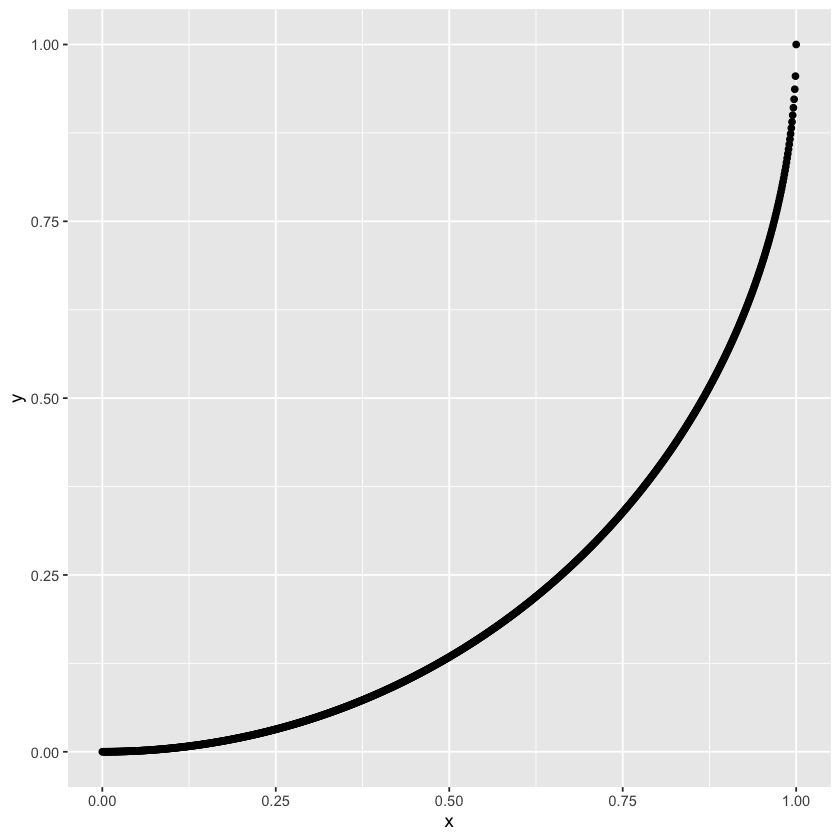

In [88]:
library(ggplot2)

number=1000
x_vec = seq(from = 0, to = 1, length.out = number)


d <- tibble(
  x = x_vec, 
  y = 1-sqrt(1-x_vec^2), 
)

options(repr.plot.width =7 , repr.plot.height =7) # グラフのサイズを指定
ggplot(d, aes(x=x, y=y)) +
    geom_point() 

---

## Rのmatrixとrep関数

`rep` replicates the values in x. It is a generic function, and the (internal) default method is described here.

```
rep(x, ...)

rep.int(x, times)

rep_len(x, length.out)
```

[matrixの参照](https://techvidvan.com/tutorials/r-matrix/)

In [158]:
set.seed(10111)
# rnorm generates random deviates.
#If mean or sd are not specified they assume the default values of 0 and 1, respectively.
# rnormで生成した15個のランダムの数を5行、3列に直す
x <- matrix(rnorm(15), 5, 3)
x

0.4992207,-0.7504743,0.3264276
-0.5095988,-0.3502830,-0.3113315
-0.3130123,0.6202636,1.7057305
0.7136758,-0.2169360,1.3354574
-1.0506291,-0.2485535,-2.3406379


In [159]:
x[1,2] # matrixの1行目、2列を選択(値は-0.7504743)

[1] -0.7504743

In [160]:
x[1,] # matrixの１行目の値を全て選択

[1]  0.4992207 -0.7504743  0.3264276

In [161]:
# （１行目と２行目）の（１列目と３列目）
x[c(1,2), c(1,3)]

0.4992207,0.3264276
-0.5095988,-0.3113315


In [162]:
#１行目を表示（TRUEだから）
#２行目を表示しない(FALSEだから)
#３行目を表示（TRUEだから）
#４行目を表示しない(FALSEだから)
#５行目を表示（TRUEだから）
x[c(TRUE, FALSE,TRUE, FALSE,TRUE),]

0.4992207,-0.7504743,0.3264276
-0.3130123,0.6202636,1.7057305
-1.0506291,-0.2485535,-2.3406379


In [163]:
# repは要素を重複する。5が２個、６が３個
y <- rep(c(5,6), c(2,3))
y

[1] 5 5 6 6 6

In [164]:
# TRUEかFALSEのvectorを出力
y == 5

[1]  TRUE  TRUE FALSE FALSE FALSE

In [165]:
# y==5の結果はTRUE TRUE FALSE FALSE FALSEだから
# 下の式は一行目、２行目だけ表示する、３から五行目はFALSEなので、表示しない
x[y == 5,]

0.4992207,-0.7504743,0.3264276
-0.5095988,-0.3502830,-0.3113315


In [166]:
# 下の式はx[y==5,]と同じ結果になる
x[c(TRUE, TRUE,FALSE, FALSE,FALSE),]

0.4992207,-0.7504743,0.3264276
-0.5095988,-0.3502830,-0.3113315


In [167]:
x[y == 5,] = x[y == 5,] + 1 # x[y == 5,]の全ての要素に１をプラス 
x[y == 5,]

1.4992207,0.2495257,1.3264276
0.4904012,0.6497170,0.6886685


---
## support vector machine入門

Support vectors are the data points that lie closest to the decision surface.
The SVM’s are less effective when the data is noisy and contains overlapping points




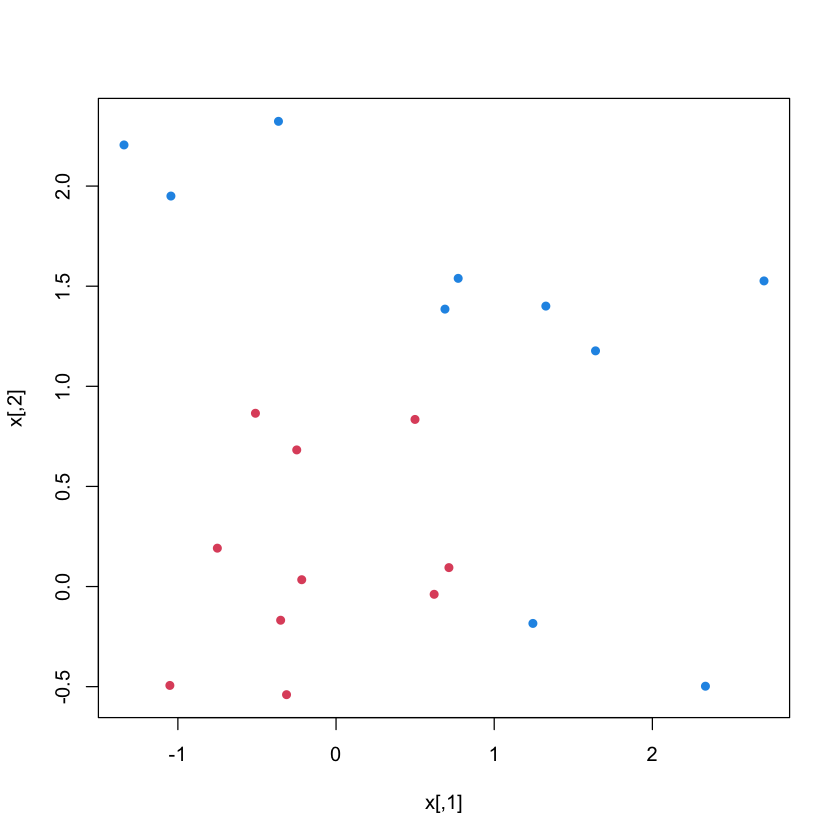

In [200]:
# まずランダムのポイントを作成
set.seed(10111)
x = matrix(rnorm(40), 20, 2) # 20行、２列のmatrix
y = rep(c(-1, 1), c(10, 10))# -1が１０個、１が１０個のvector
x[y == 1,] = x[y == 1,] + 1 # matrxi xの後ろの１０行のすべの要素に１をプラス

# colは1,2,3,4,5,6のような値で、違う色を示している
# pchはポイントの形状で10,11, 12,14,14,,,,16, 17,18,19
plot(x, col = y+3, pch = 16)

In [201]:
# e1071パッケージは、統計学習とデータマイニングのための関数を提供している
install.packages("e1071")
library(e1071)


The downloaded binary packages are in
	/var/folders/w2/kvdjj0td38v9dyn6lk80hj7w0000gp/T//RtmpGvw6rj/downloaded_packages


In [202]:
dat <- data.frame(x, y = as.factor(y))
dat

X1,X2,y
<dbl>,<dbl>,<fct>
0.4992207,0.83459057,-1
-0.5095988,0.86535664,-1
-0.3130123,-0.54000741,-1
0.7136758,0.09454017,-1
-1.0506291,-0.49390571,-1
-0.7504743,0.19165412,-1
-0.3502830,-0.16827662,-1
0.6202636,-0.03877393,-1
-0.2169360,0.03409674,-1


In [208]:
# make a dataframe of the data, turning y into a factor variable. 
# After that, you make a call to svm on this dataframe, using y as the response variable and other variables as the predictors. 

# The formula "y ~ ." specifies that the response variable is "y" and 
# all other columns in the data frame should be used as predictors.

# The "kernel" argument specifies that a linear kernel should be used, 
# while the "cost" argument sets the cost parameter to 10.


# The "scale" argument is set to FALSE, 
# which means that the data will not be scaled before fitting the model.

# The cost parameter decides how much an SVM should be allowed to “bend” with the data. 
# For a low cost, you aim for a smooth decision surface, and for a higher cost, you aim to classify more points correctly. 
# It is also simply referred to as the cost of misclassification.

svmfit = svm(y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)
print(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  6



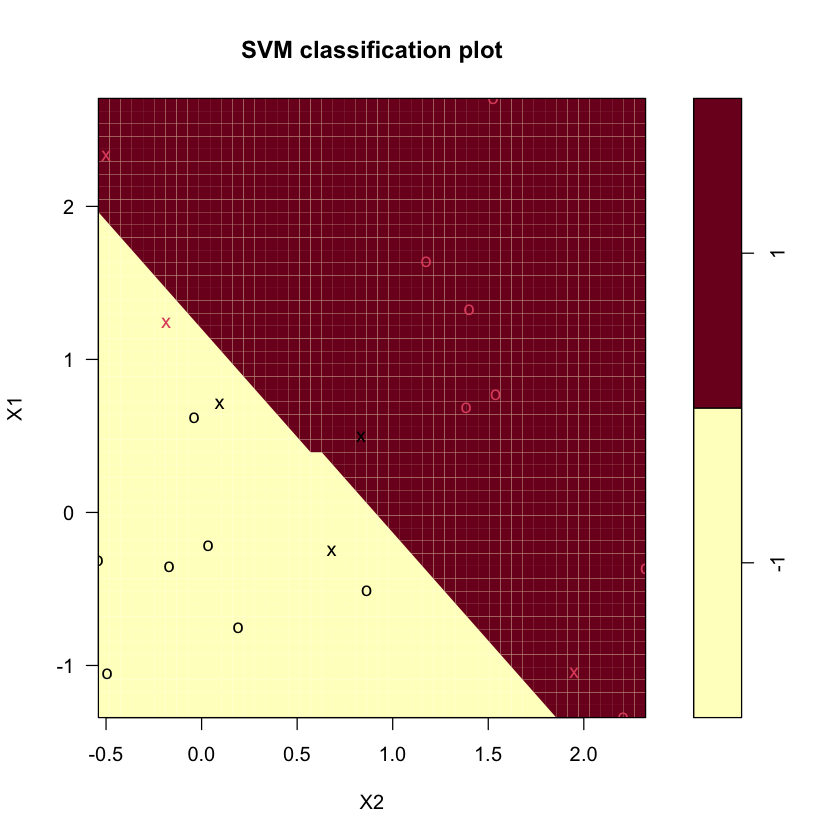

In [204]:
plot(svmfit, dat)

---
## (WIP)Cross validation

[参照リンク](https://quantdev.ssri.psu.edu/tutorials/cross-validation-tutorial)

In [219]:
# install.packages('caret')
# install.packages('psych')

library(caret)
library(psych)

data <- sat.act
head(data)

,gender,education,age,ACT,SATV,SATQ
,<int>,<int>,<int>,<int>,<int>,<int>
29442,2,3,19,24,500,500
29457,2,3,23,35,600,500
29498,2,3,20,21,480,470
29503,1,4,27,26,550,520
29504,1,2,33,31,600,550
29518,1,5,26,28,640,640


In [218]:
describe(sat.act)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gender,1,700,1.647143,0.4782004,2,1.683929,0.0000,1,2,1,-0.6145233,-1.62467597,0.01807428
education,2,700,3.164286,1.4253515,3,3.307143,1.4826,0,5,5,-0.6807999,-0.07489124,0.05387322
age,3,700,25.594286,9.4986466,22,23.862500,5.9304,13,65,52,1.6430573,2.42430535,0.35901510
ACT,4,700,28.547143,4.8235599,29,28.842857,4.4478,3,36,33,-0.6564026,0.53496913,0.18231343
SATV,5,700,612.234286,112.9025659,620,619.453571,118.6080,200,800,600,-0.6438111,0.32519458,4.26731588
SATQ,6,687,610.216885,115.6392972,620,617.254083,118.6080,200,800,600,-0.5929212,-0.01776025,4.41191437


In [220]:
data_ctrl <- trainControl(method = "cv", number = 5)
data_ctrl

$method
[1] "cv"

$number
[1] 5

$repeats
[1] NA

$search
[1] "grid"

$p
[1] 0.75

$initialWindow
NULL

$horizon
[1] 1

$fixedWindow
[1] TRUE

$skip
[1] 0

$verboseIter
[1] FALSE

$returnData
[1] TRUE

$returnResamp
[1] "final"

$savePredictions
[1] FALSE

$classProbs
[1] FALSE

$summaryFunction
function (data, lev = NULL, model = NULL) 
{
    if (is.character(data$obs)) 
        data$obs <- factor(data$obs, levels = lev)
    postResample(data[, "pred"], data[, "obs"])
}
<bytecode: 0x7fe1a09434a0>
<environment: namespace:caret>

$selectionFunction
[1] "best"

$preProcOptions
$preProcOptions$thresh
[1] 0.95

$preProcOptions$ICAcomp
[1] 3

$preProcOptions$k
[1] 5

$preProcOptions$freqCut
[1] 19

$preProcOptions$uniqueCut
[1] 10

$preProcOptions$cutoff
[1] 0.9


$sampling
NULL

$index
NULL

$indexOut
NULL

$indexFinal
NULL

$timingSamps
[1] 0

$predictionBounds
[1] FALSE FALSE

$seeds
[1] NA

$adaptive
$adaptive$min
[1] 5

$adaptive$alpha
[1] 0.05

$adaptive$method
[1] "gls"

$adaptive$complete
[1] TRUE


$trim
[1] FALSE

$allowParallel
[1] TRUE

---

## Titanic データセットを探索

[参照リンク](https://www.youtube.com/watch?v=Zx2TguRHrJE)

In [1]:
titanic.train <- read.csv("data/02_titanic_train.csv"
                          , stringsAsFactors=FALSE
                          , header = TRUE
                         )
titanic.test <- read.csv("data/02_titanic_test.csv"
                          , stringsAsFactors=FALSE
                          , header = TRUE
                         )


In [2]:
median(titanic.train$Age)

[1] NA

In [3]:
median(titanic.train$Age, na.rm=TRUE)

[1] 28

In [4]:
median(titanic.test$Age, na.rm=TRUE)

[1] 27

In [5]:
titanic.train$IsTrainSet <- TRUE

In [6]:
tail(titanic.train$IsTrainSet)

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [7]:
titanic.test$IsTrainSet <- FALSE

In [8]:
tail(titanic.test$IsTrainSet)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [9]:
ncol(titanic.test)

[1] 12

In [10]:
ncol(titanic.train)

[1] 13

In [11]:
names(titanic.train)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"    "IsTrainSet"

In [12]:
names(titanic.test)

[1] "PassengerId" "Pclass"      "Name"        "Sex"         "Age"        
 [6] "SibSp"       "Parch"       "Ticket"      "Fare"        "Cabin"      
[11] "Embarked"    "IsTrainSet"

In [13]:
titanic.test$Survived <- NA

In [14]:
names(titanic.test)

[1] "PassengerId" "Pclass"      "Name"        "Sex"         "Age"        
 [6] "SibSp"       "Parch"       "Ticket"      "Fare"        "Cabin"      
[11] "Embarked"    "IsTrainSet"  "Survived"

In [15]:
titanic.full <- rbind(titanic.train, titanic.test)
#titanic.full

In [16]:
table(titanic.full$IsTrainSet)


FALSE  TRUE 
  418   891 

In [17]:
table(titanic.full$Embarked)


      C   Q   S 
  2 270 123 914 

In [18]:
titanic.full[titanic.full$Embarked == '',]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrainSet
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<lgl>
62,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,,TRUE
830,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,,TRUE


In [19]:
titanic.full[titanic.full$Embarked == '', "Embarked"]

[1] "" ""

In [20]:
titanic.full[titanic.full$Embarked == '', "Embarked"] <- 'S'

In [21]:
titanic.full[titanic.full$Embarked == '',]

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrainSet
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<lgl>


In [22]:
table(titanic.full$Embarked)


  C   Q   S 
270 123 916 

In [23]:
table(is.na(titanic.full$Age))


FALSE  TRUE 
 1046   263 

In [24]:
age.median <- median(titanic.full$Age, na.rm=TRUE)
age.median

[1] 28

In [26]:
tail(titanic.full[is.na(titanic.full$Age), ])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrainSet
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<lgl>
1276,1276,NA,2,"Wheeler, Mr. Edwin Frederick""""",male,NA,0,0,SC/PARIS 2159,12.8750,,S,FALSE
1300,1300,NA,3,"Riordan, Miss. Johanna Hannah""""",female,NA,0,0,334915,7.7208,,Q,FALSE
1302,1302,NA,3,"Naughton, Miss. Hannah",female,NA,0,0,365237,7.7500,,Q,FALSE
1305,1305,NA,3,"Spector, Mr. Woolf",male,NA,0,0,A.5. 3236,8.0500,,S,FALSE
1308,1308,NA,3,"Ware, Mr. Frederick",male,NA,0,0,359309,8.0500,,S,FALSE
1309,1309,NA,3,"Peter, Master. Michael J",male,NA,1,1,2668,22.3583,,C,FALSE


In [27]:
titanic.full[is.na(titanic.full$Age), "Age"] <- age.median

In [28]:
table(is.na(titanic.full$Age))


FALSE 
 1309 

In [29]:
table(is.na(titanic.full$Fare))


FALSE  TRUE 
 1308     1 

In [30]:
fare.median <- median(titanic.full$Fare, na.rm=TRUE)
fare.median

[1] 14.4542

In [31]:
titanic.full[is.na(titanic.full$Fare), "Fare"] <- fare.median

In [32]:
table(is.na(titanic.full$Fare))


FALSE 
 1309 

In [55]:
# str(titanic.full)
head(as.factor(titanic.full$Pclass))
head(as.factor(titanic.full$Sex))
head(as.factor(titanic.full$Embarked))
# str(titanic.full)


[1] 3 1 3 1 3 3
Levels: 1 2 3

[1] male   female female female male   male  
Levels: female male

[1] S C S S S Q
Levels: C Q S

In [34]:
titanic.train <- titanic.full[titanic.full$IsTrainSet == TRUE,]

In [35]:
tail(titanic.train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrainSet
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<lgl>
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q,TRUE
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S,TRUE
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S,TRUE
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.450,,S,TRUE
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C,TRUE
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q,TRUE


In [36]:
titanic.test <- titanic.full[titanic.full$IsTrainSet == FALSE,]
tail(titanic.test)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrainSet
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<lgl>
1304,1304,NA,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,,S,FALSE
1305,1305,NA,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,,S,FALSE
1306,1306,NA,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,FALSE
1307,1307,NA,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,,S,FALSE
1308,1308,NA,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,,S,FALSE
1309,1309,NA,3,"Peter, Master. Michael J",male,28.0,1,1,2668,22.3583,,C,FALSE


In [37]:
titanic.train$Survived <- as.factor(titanic.train$Survived)

In [54]:
head(titanic.train$Survived)

[1] 0 1 1 1 0 0
Levels: 0 1

In [39]:
str(titanic.train)

'data.frame':	891 obs. of  13 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 28 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 $ IsTrainSet : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


In [40]:
survived.equation <- "Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked"
survived.equation

[1] "Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked"

In [41]:
survived.formula <- as.formula(survived.equation)
survived.formula

Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked

In [44]:
#install.packages("randomForest")

In [45]:
library(randomForest)

In [46]:
titanic.model <- randomForest(formula = survived.formula
             , data = titanic.train
             , ntree = 500
             , mtry=3
            , nodesize=0.01 * nrow(titanic.test))


In [47]:
features.equation <- "Pclass + Sex + Age + SibSp + Parch + Fare + Embarked"


In [48]:
Survived <- predict(titanic.model, newdata=titanic.test)

In [49]:
tail(Survived)

1304 1305 1306 1307 1308 1309 
   0    0    1    0    0    1 
Levels: 0 1

In [50]:
PassengerId <- titanic.test$PassengerId
tail(PassengerId)

[1] 1304 1305 1306 1307 1308 1309

In [51]:
output.df <- as.data.frame(PassengerId)
tail(output.df)

,PassengerId
,<int>
413,1304
414,1305
415,1306
416,1307
417,1308
418,1309


In [52]:
output.df$Survived <- Survived
tail(output.df)

,PassengerId,Survived
,<int>,<fct>
413,1304,0
414,1305,0
415,1306,1
416,1307,0
417,1308,0
418,1309,1


In [53]:
write.csv(output.df
          , file="./data/02_titanic_kaggle_submission.csv"
        , row.names = FALSE
         )


---
## R の配列

In [72]:
array_1 <- array(
  data = 1:30,    # データ
  dim = c(3,5,2)  # (行数、列数、行列の数)
)
print(array_1)

, , 1

     [,1] [,2] [,3] [,4] [,5]
[1,]    1    4    7   10   13
[2,]    2    5    8   11   14
[3,]    3    6    9   12   15

, , 2

     [,1] [,2] [,3] [,4] [,5]
[1,]   16   19   22   25   28
[2,]   17   20   23   26   29
[3,]   18   21   24   27   30



In [73]:
# 2:２個目の行列
# 1: 1行目
# スペース:全ての列
array_1[1,,2]

[1] 22

---
## Rの時系列データ

In [75]:
# 時系列データに変換
ts_1 <- ts(
  data.frame(data= 1:24),      # 対象データ
  start = c(2010,1), # 開始年月
  frequency = 12     # 1年におけるデータの数(頻度)
)
ts_1

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,1,2,3,4,5,6,7,8,9,10,11,12
2011,13,14,15,16,17,18,19,20,21,22,23,24


---
## Rのカーネル型密度関数(density)

カーネル型密度関数はある変数の分布を概観するに適切でよく用いられる。`plot(density(x))`で、 $x$ には数値ベクトルを与える。



,length
,<dbl>
1,8.747092
2,10.367287
3,8.328743


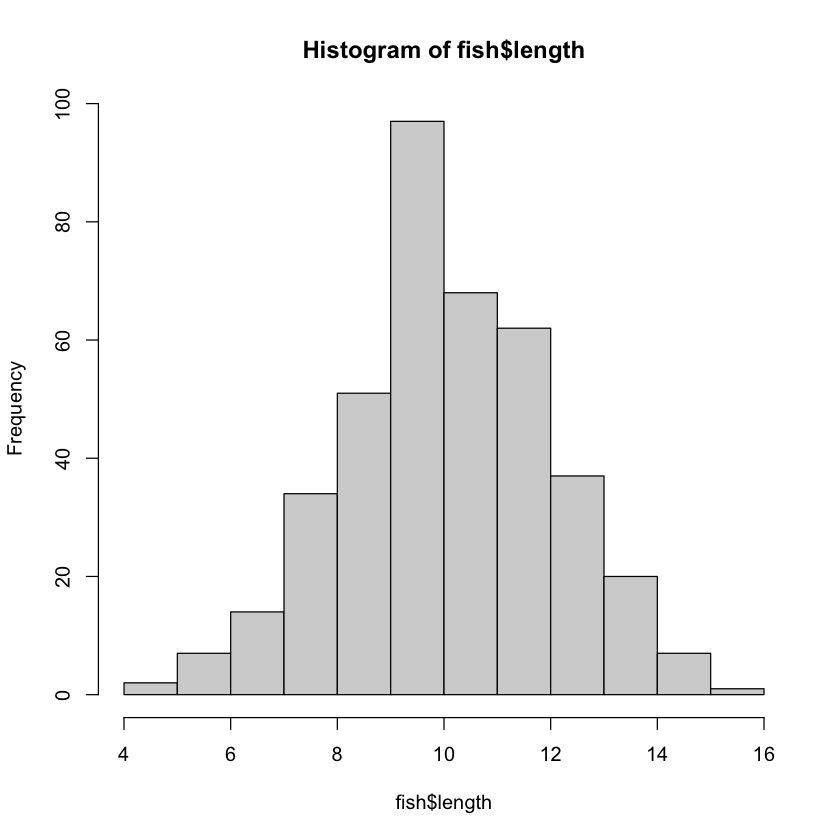

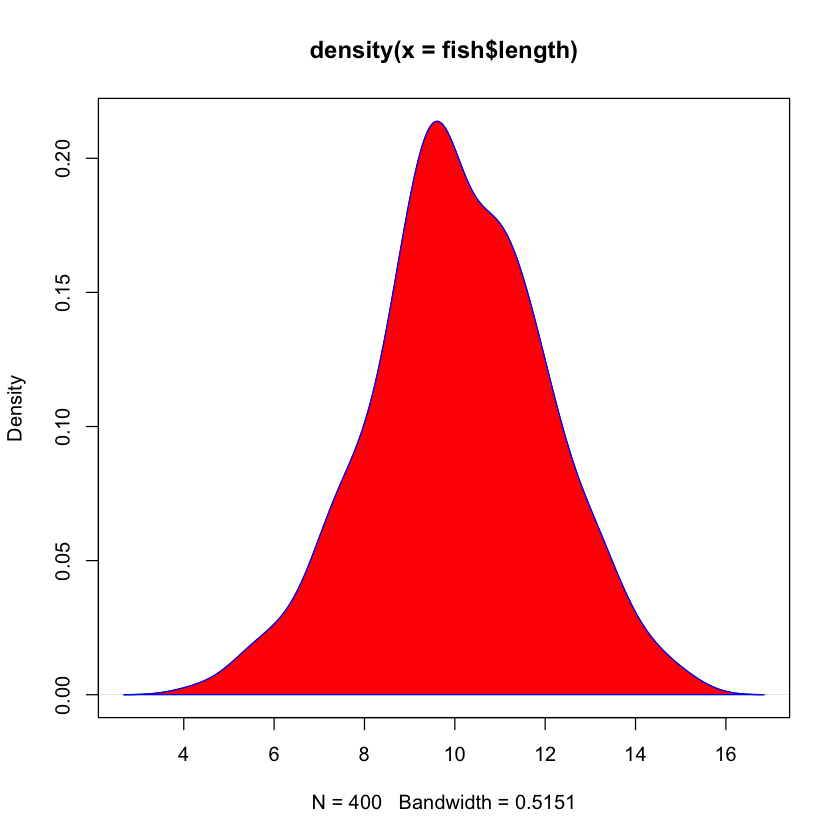

In [92]:
fish <- read.csv("./book-r-stan-bayesian-model-intro/book-data/2-2-1-fish.csv")
head(fish, n = 3)

# ヒストグラム
hist(fish$length)


# カーネル密度推定 ----------------------------------------------------------------

# カーネル密度推定
kernel_density <- density(fish$length)
plot(kernel_density)

# グラフを赤で塗り潰し
# 青のborderにする
polygon(kernel_density, col="red", border="blue")



---
## density関数のbandwidth

adjustでbandwidthを調整

adjustは高ければ滑らかになる

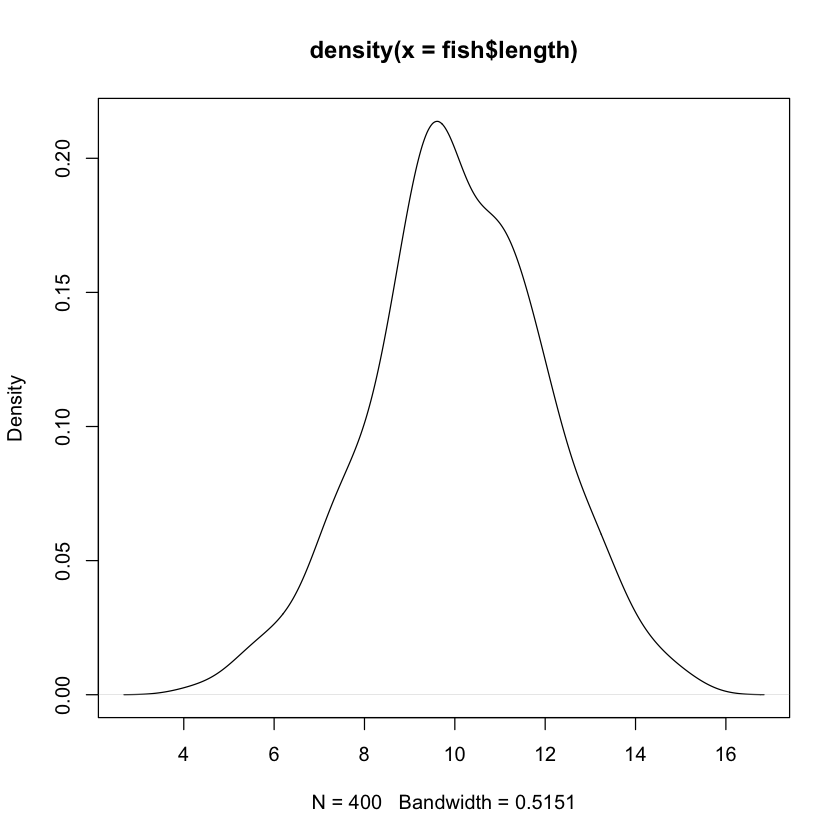

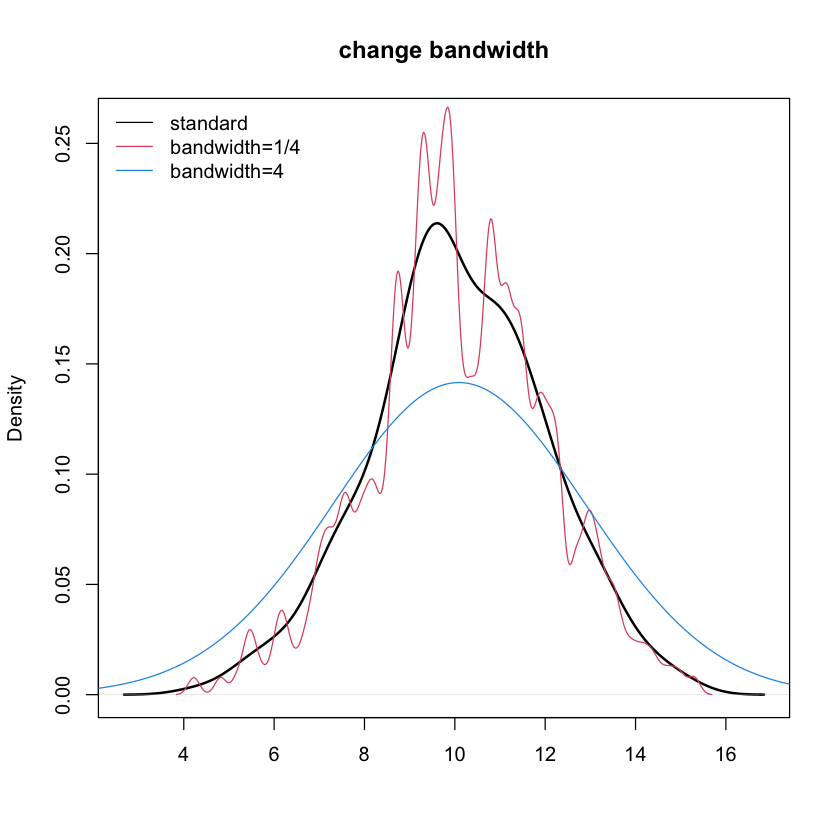

In [8]:
fish <- read.csv("./book-r-stan-bayesian-model-intro/book-data/2-2-1-fish.csv")

# カーネル密度推定
kernel_density <- density(fish$length)
plot(kernel_density)

# バンド幅をadjust倍に変更します
kernel_density_quarter <- density(fish$length, adjust = 0.25)
kernel_density_quadruple <- density(fish$length, adjust = 4)

# 結果の図示
plot(kernel_density, 
     lwd = 2,                   # 線の太さ
     xlab = "",                 # x軸ラベル名称をなくす 
     ylim = c(0, 0.26),         # y軸の範囲
     main = "change bandwidth") # グラフのタイトル
lines(kernel_density_quarter, col = 2)
lines(kernel_density_quadruple, col = 4)

# 凡例を追加
legend("topleft",       # 凡例の位置
       col = c(1,2,4),  # 線の色
       lwd = 1,         # 線の太さ
       bty = "n",       # 凡例の囲み線を消す
       legend = c("standard", "bandwidth=1/4", "bandwidth=4"))


---
## 四分位数
[四文位数求め方](https://bellcurve.jp/statistics/course/19277.html)

In [16]:
x_vec <- c(8, 9, 4, 3, 1)
quantile(x_vec, probs=c(0.25))
quantile(x_vec, probs=c(0.5))

25% 
  3

50% 
  4

In [17]:
x_vec <- c(8, 9, 3, 1)
quantile(x_vec, probs=c(0.25, 0.5)) # 1,3, 8,9で並んで、(3+8)/2 = 5.5


25% 50% 
2.5 5.5